<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Processing-of-a-simulation" data-toc-modified-id="Processing-of-a-simulation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Processing of a simulation</a></span><ul class="toc-item"><li><span><a href="#dhdt" data-toc-modified-id="dhdt-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>dhdt</a></span></li><li><span><a href="#MASK" data-toc-modified-id="MASK-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>MASK</a></span><ul class="toc-item"><li><span><a href="#Grounded-area-variation" data-toc-modified-id="Grounded-area-variation-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Grounded area variation</a></span></li></ul></li><li><span><a href="#ssa-velocity" data-toc-modified-id="ssa-velocity-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>ssa velocity</a></span></li><li><span><a href="#GIF" data-toc-modified-id="GIF-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>GIF</a></span></li><li><span><a href="#difference-ssa-velocity" data-toc-modified-id="difference-ssa-velocity-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>difference ssa velocity</a></span></li><li><span><a href="#Thickness" data-toc-modified-id="Thickness-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Thickness</a></span><ul class="toc-item"><li><span><a href="#Free-ice-area" data-toc-modified-id="Free-ice-area-1.6.1"><span class="toc-item-num">1.6.1&nbsp;&nbsp;</span>Free ice area</a></span></li></ul></li></ul></li></ul></div>

# Processing of a simulation




In [1]:
import glob
import numpy as np
import pyvista as pv
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

size=15
params = {'legend.fontsize': 'large',
          'figure.figsize': (20,8),
          'axes.labelsize': size,
          'axes.titlesize': size,
          'xtick.labelsize': size*0.75,
          'ytick.labelsize': size*0.75,
          'axes.titlepad': 25}
plt.rcParams.update(params)

# load data 1
url='/home/urrutyb/Documents/simu/bedmap_20yrs/'
files = glob.glob(url + 'run*.pvtu')
files_no = sorted(glob.glob(url + 'run*1.pvtu'))

figure=url + 'figure/'
files = sorted(files)
files = [i for i in files if i not in files_no[1:]]
files.remove(files[0])

blocks = pv.MultiBlock([pv.read(f) for f in files])

# for i, block in enumerate(blocks):
#     block["node_value"] = np.full(block.n_points, i)   

files = np.sort(glob.glob(url + 'Scalars_run*_.dat'))
files_1 = np.sort(glob.glob(url + 'INITMIP_Scalar_OUTPUT_run*_.dat'))
# variable INITMIP_scalar
Time = []
Volume = []
Volume_Floatation = []
Volume_change = []
SMB = []
BMB = []
residual_flux = []
Ice_Discharge = []
Iceflux_GL = []
GIA = []
FIA = []
Free = []
# variable scalar
timebis = []
volumebis = []
volumegrounded = []
h = []
dhdt = []
smbbis = []
pdc_melt = []
h_residual = []
convective_flux = []
min_conflux = []
max_conflux = []
max_dhdt = []
min_dhdt = []
for i in range(0, len(files)):
    var1, var2, var3, var4, var5, var6, var7, var8, var9, var10, var11, var12 = np.loadtxt(
        files_1[i], unpack=True)
    var13, var14, var15, var16, var17, var18, var19, var20, var21, var22, var23, var24, var25 = np.loadtxt(
        files[i], unpack=True)
    Time = np.concatenate((Time, var1))
    Volume = np.concatenate((Volume, var2))
    Volume_Floatation = np.concatenate((Volume_Floatation, var3))
    Volume_change = np.concatenate((Volume_change, var4))
    SMB = np.concatenate((SMB, var5))
    BMB = np.concatenate((BMB, var6))
    residual_flux = np.concatenate((residual_flux, var7))
    Ice_Discharge = np.concatenate((Ice_Discharge, var8))
    Iceflux_GL = np.concatenate((Iceflux_GL, var9))
    GIA = np.concatenate((GIA, var10))
    FIA = np.concatenate((FIA, var11))
    Free = np.concatenate((Free, var12))
    #
    timebis = np.concatenate((timebis, var13))
    volumebis = np.concatenate((volumebis, var14))
    volumegrounded = np.concatenate((volumegrounded, var15))
    h = np.concatenate((h, var16))
    dhdt = np.concatenate((dhdt, var17))
    h_residual = np.concatenate((h_residual, var20))
    convective_flux = np.concatenate((convective_flux, var21))
    min_conflux = np.concatenate((min_conflux, var22))
    max_conflux = np.concatenate((max_conflux, var23))
    max_dhdt = np.concatenate((max_dhdt, var24))
    min_dhdt = np.concatenate((min_dhdt, var25))


## dhdt

In [2]:
# for i in range(0,len(blocks)):
#     pl = pv.Plotter()
#     pl.add_mesh(blocks[i], scalars='dhdt',clim=[-10,10], cmap='bwr')
#     pl.add_text(str(i),position='upper_left', font_size=18, color=None, font=None, shadow=True, viewport=False)
#     pl.show(cpos='xy', screenshot=figure + 'dhdt'+str(i)+'.png')

## MASK

### Grounded area variation

The comparison of the groundedmask at t=i and t=i+1 give the difference of deplacement of the grounding line. We can see where the GL is retreating or advanced. There is more movement at the beginning of the simulation.

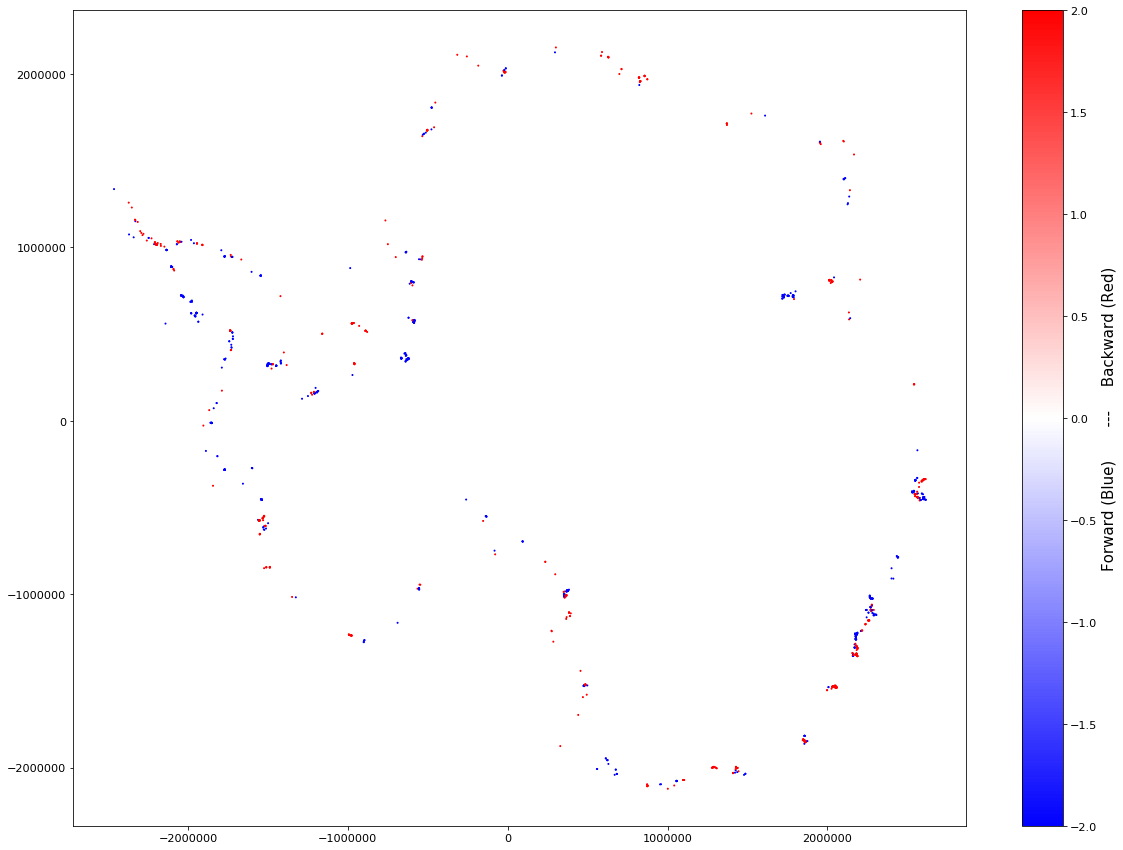

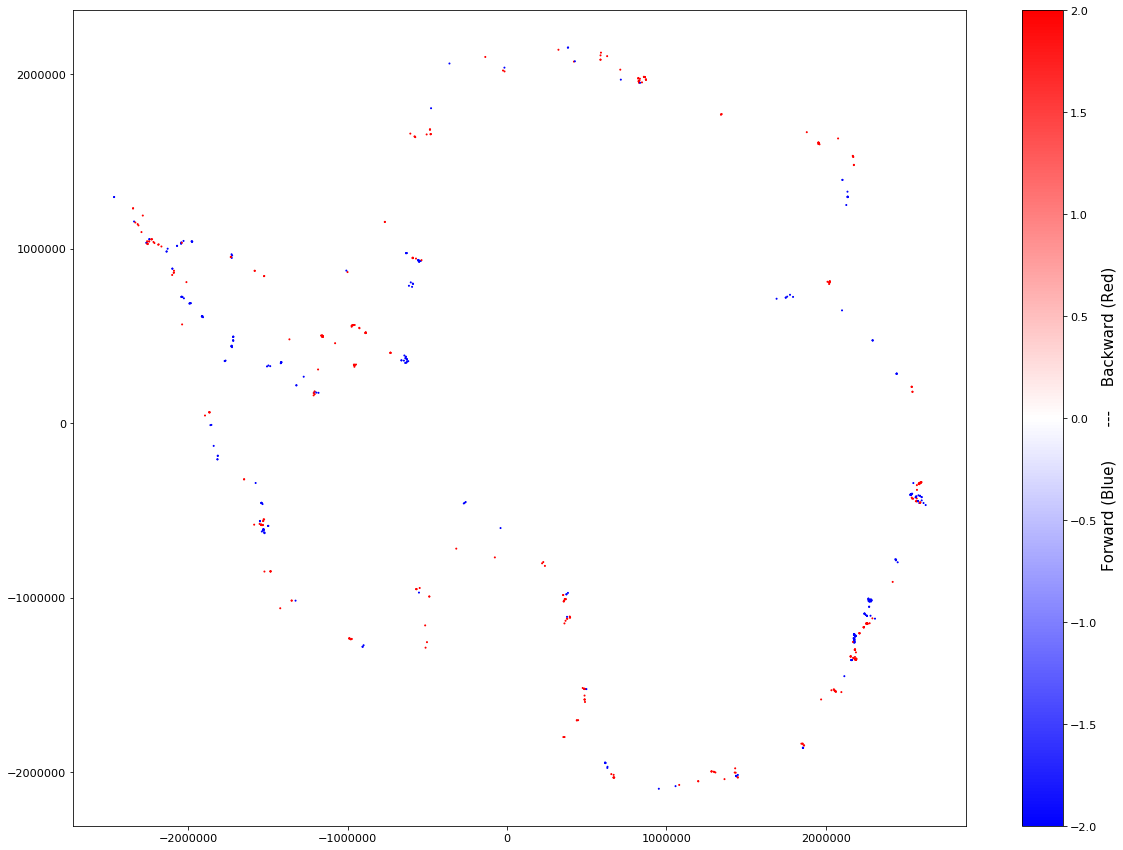

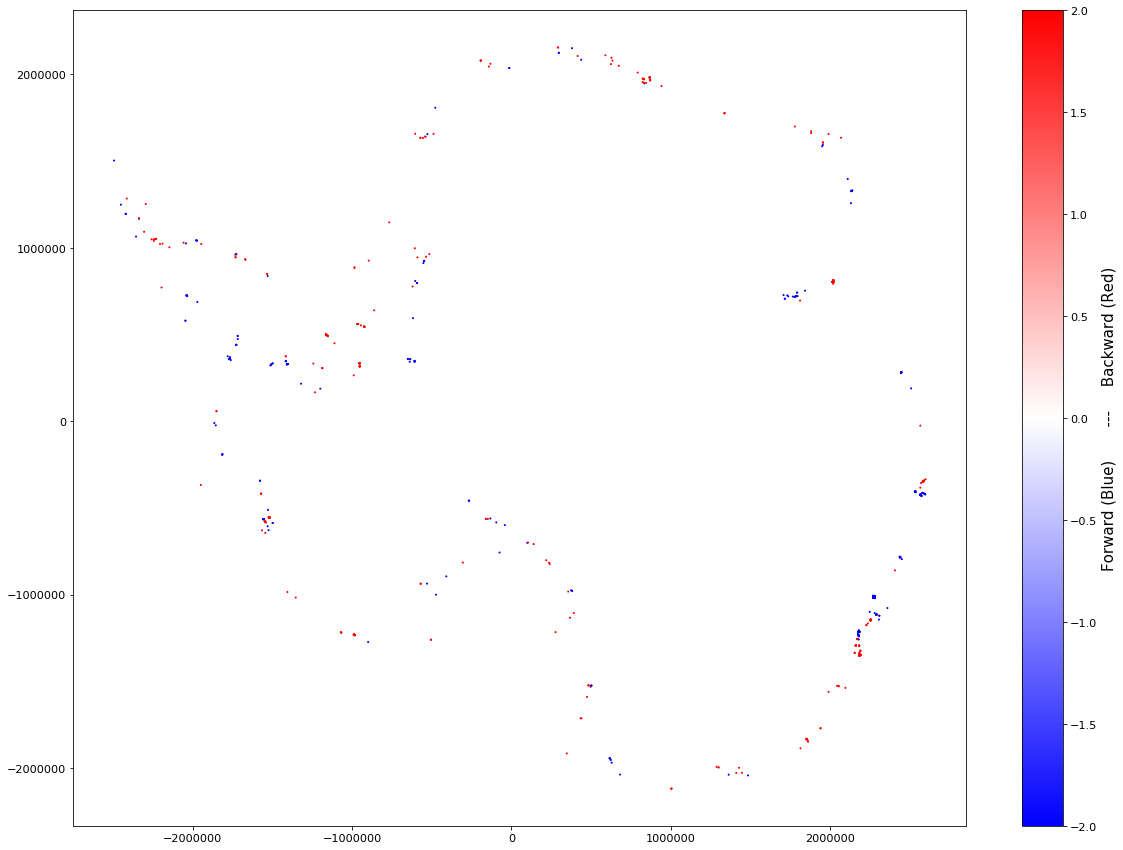

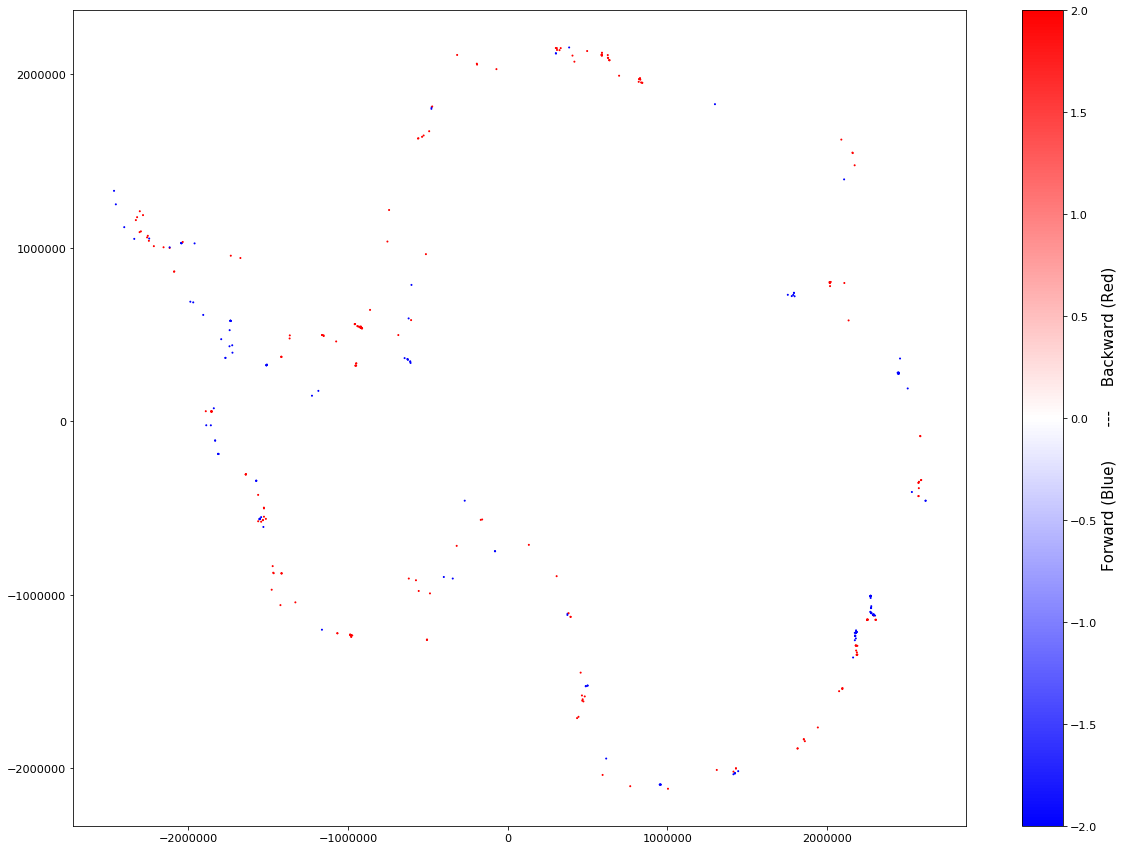

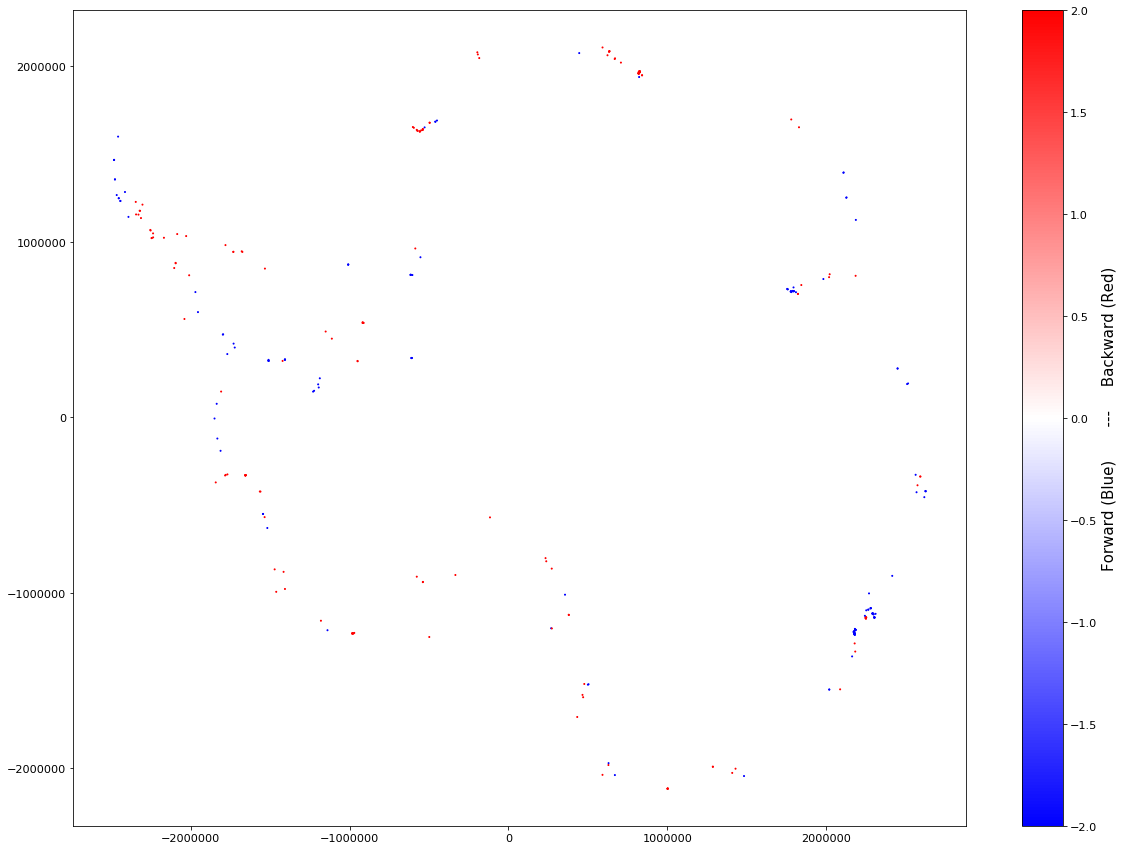

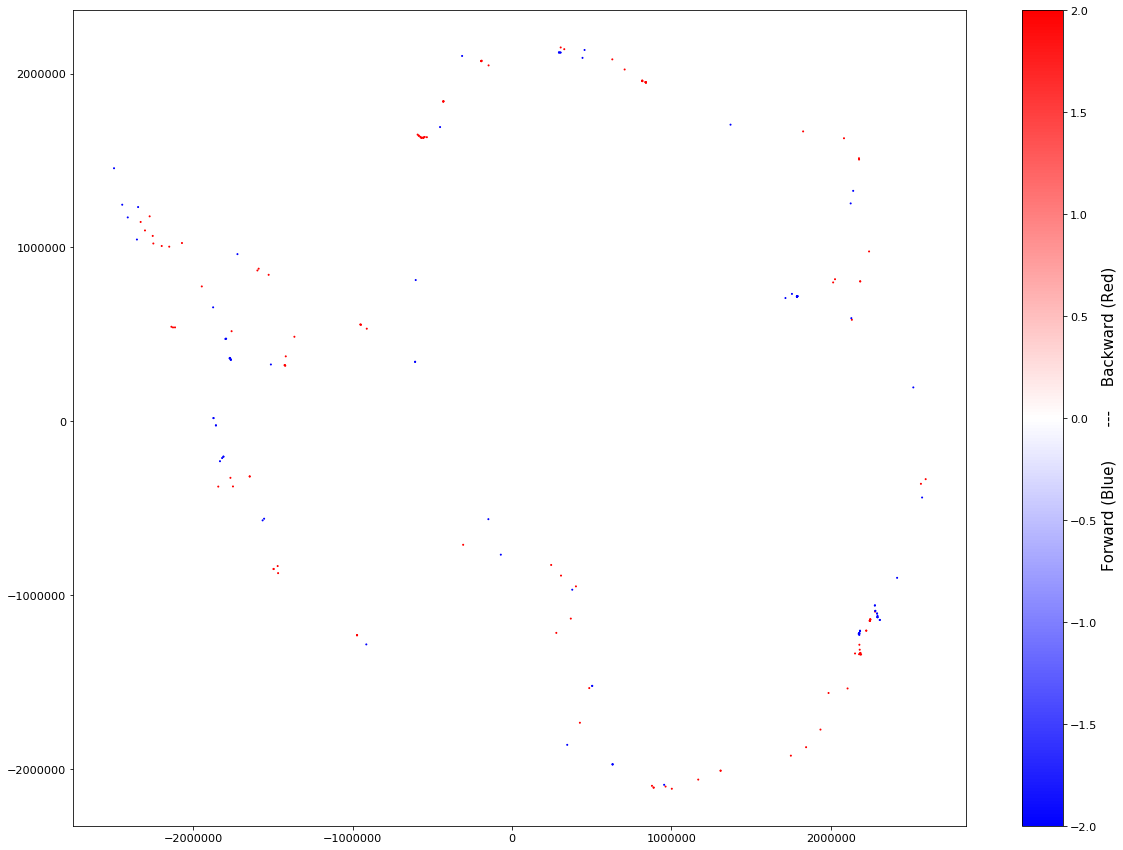

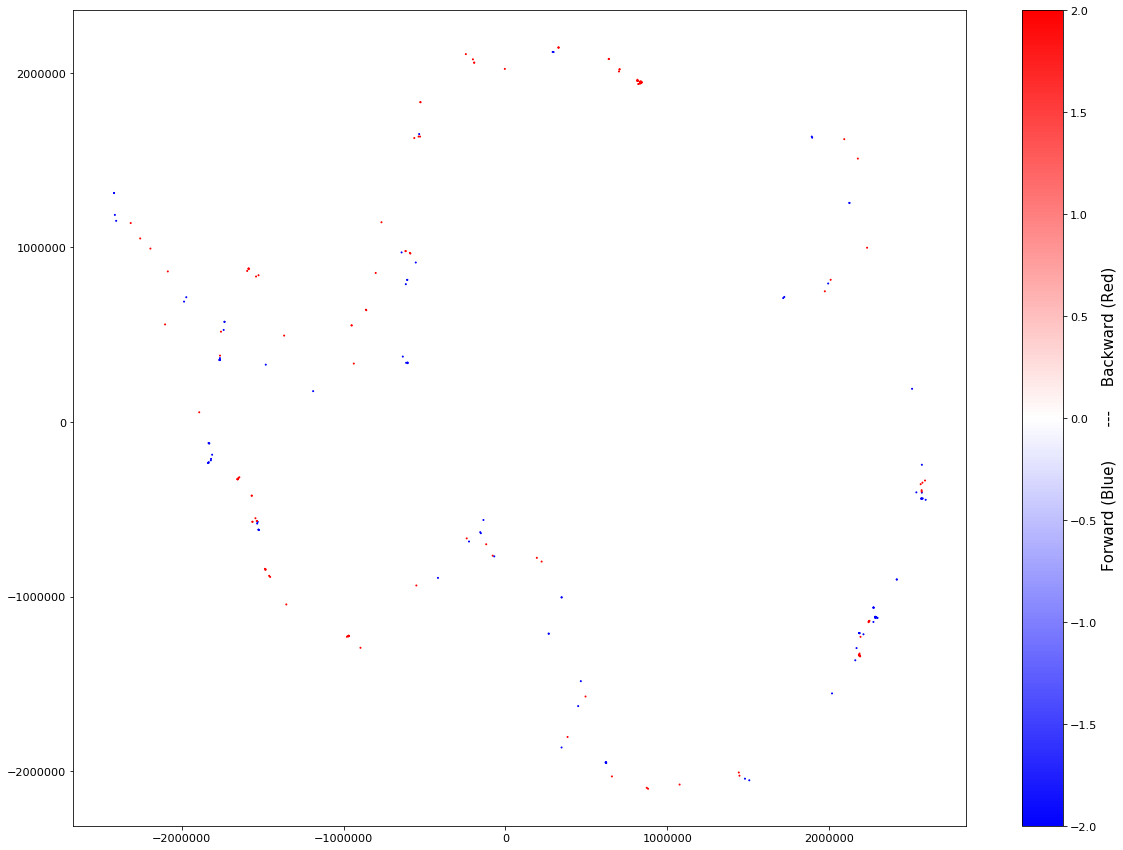

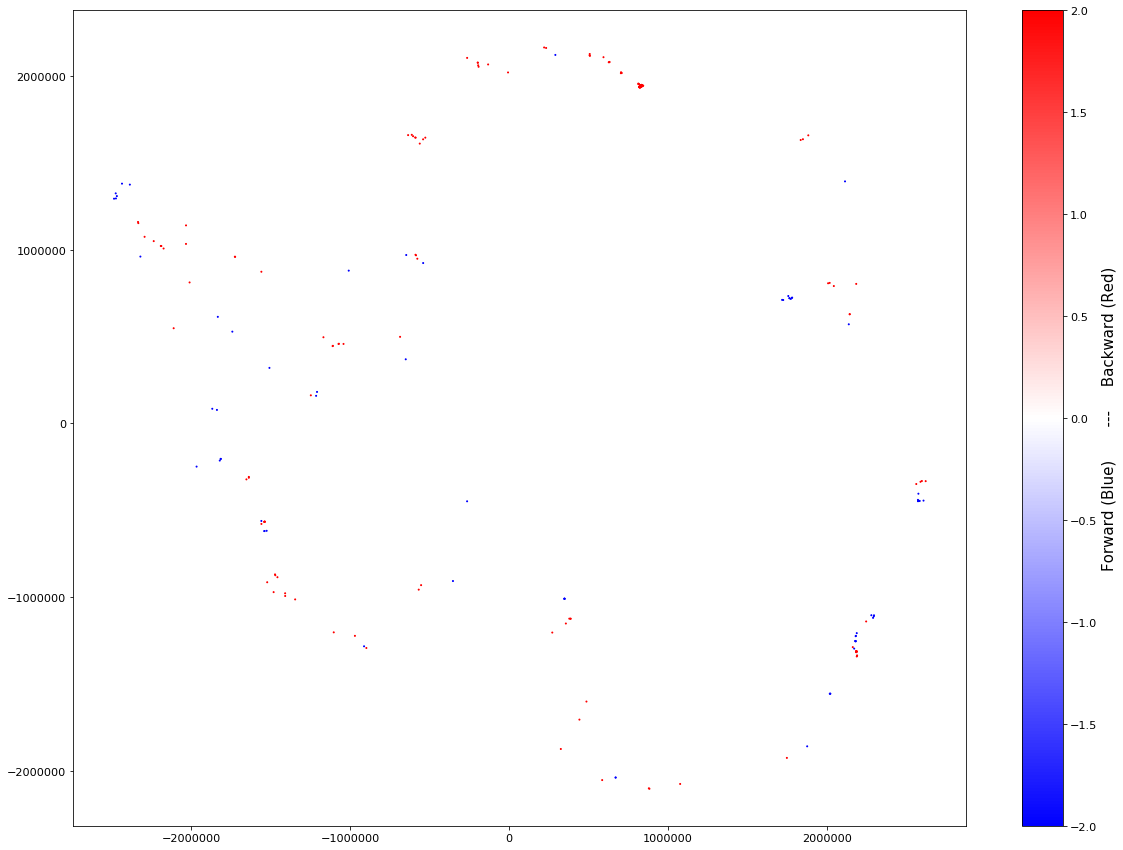

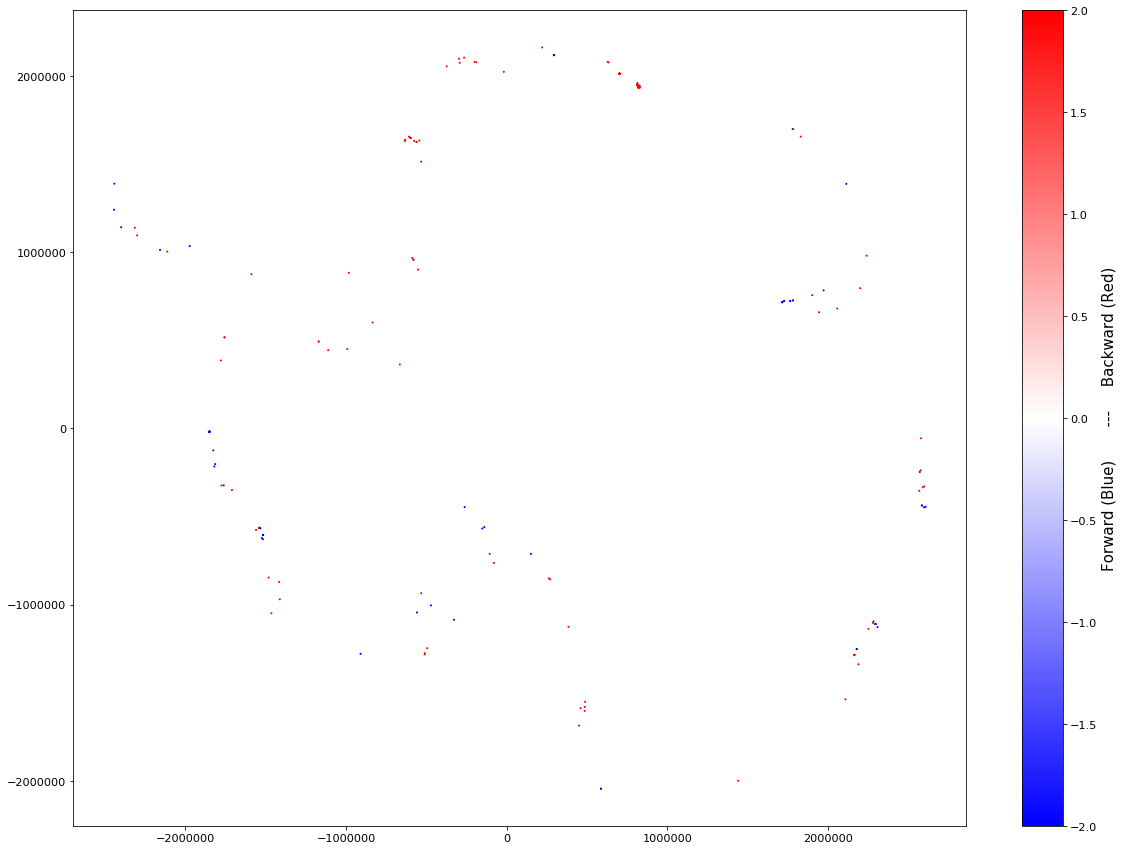

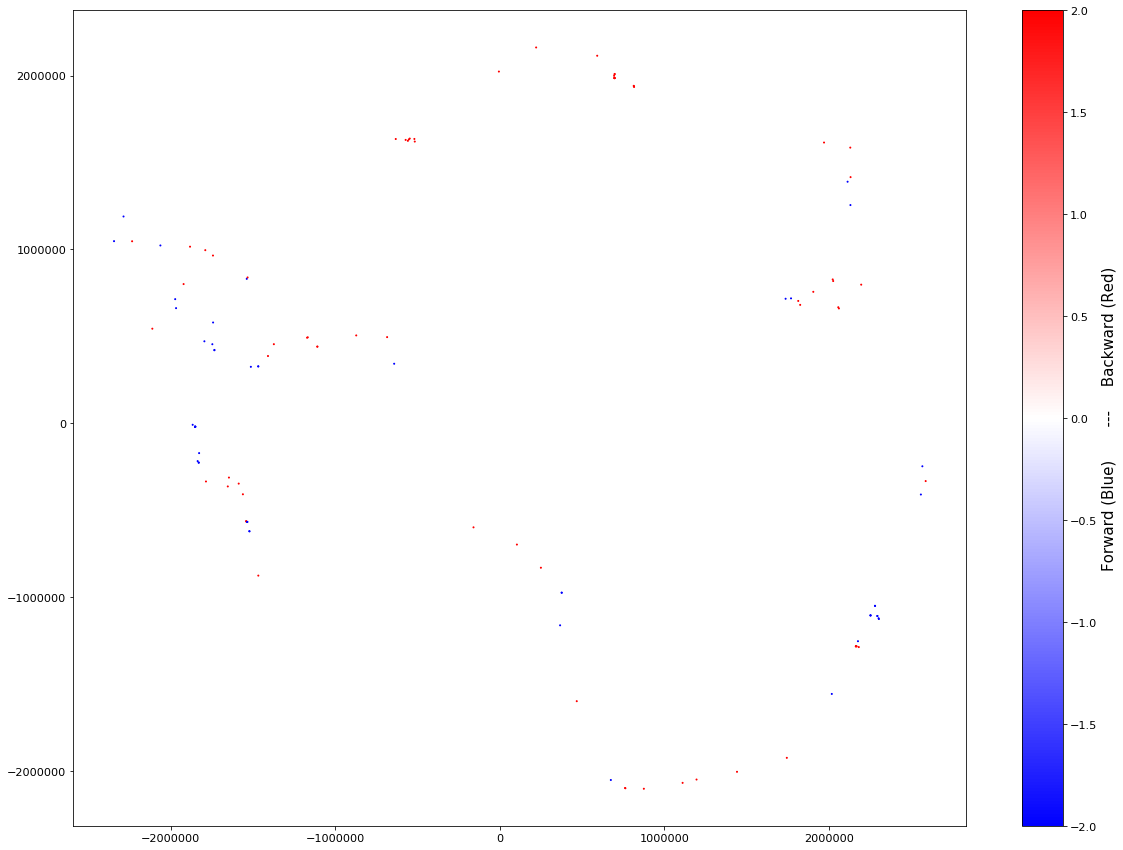

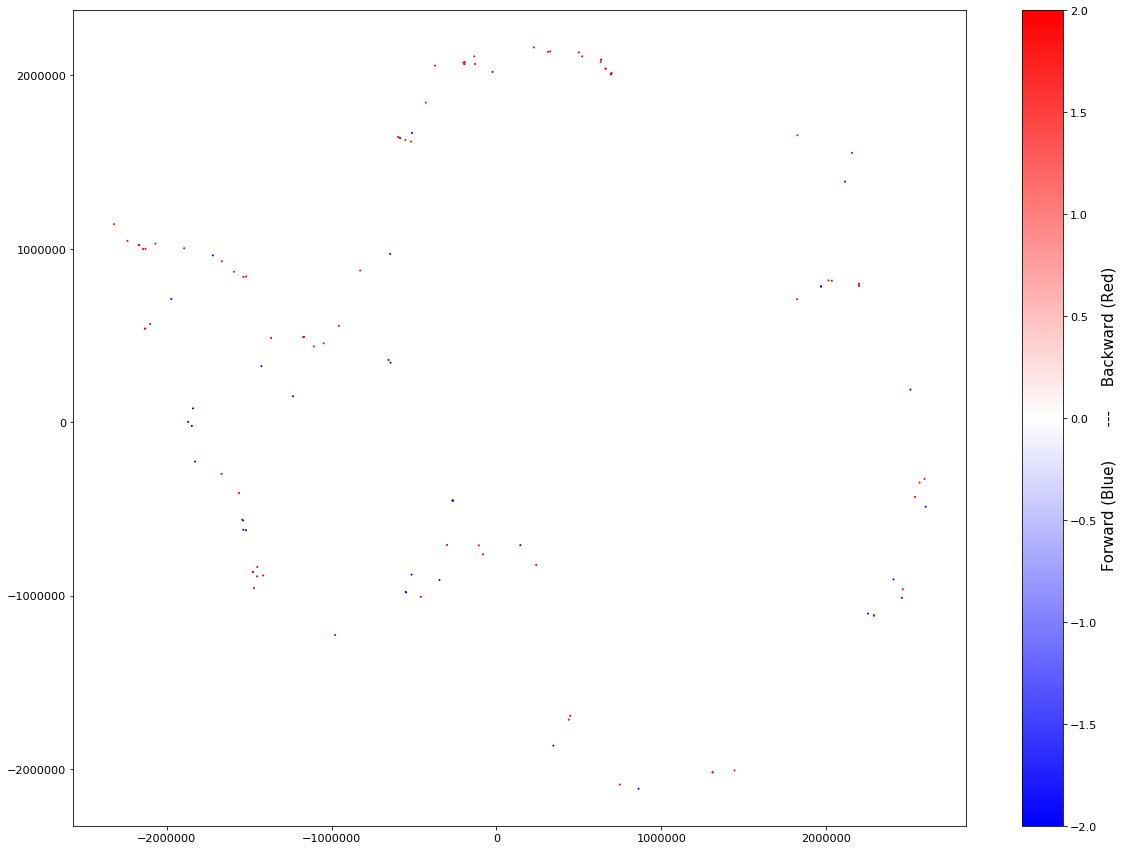

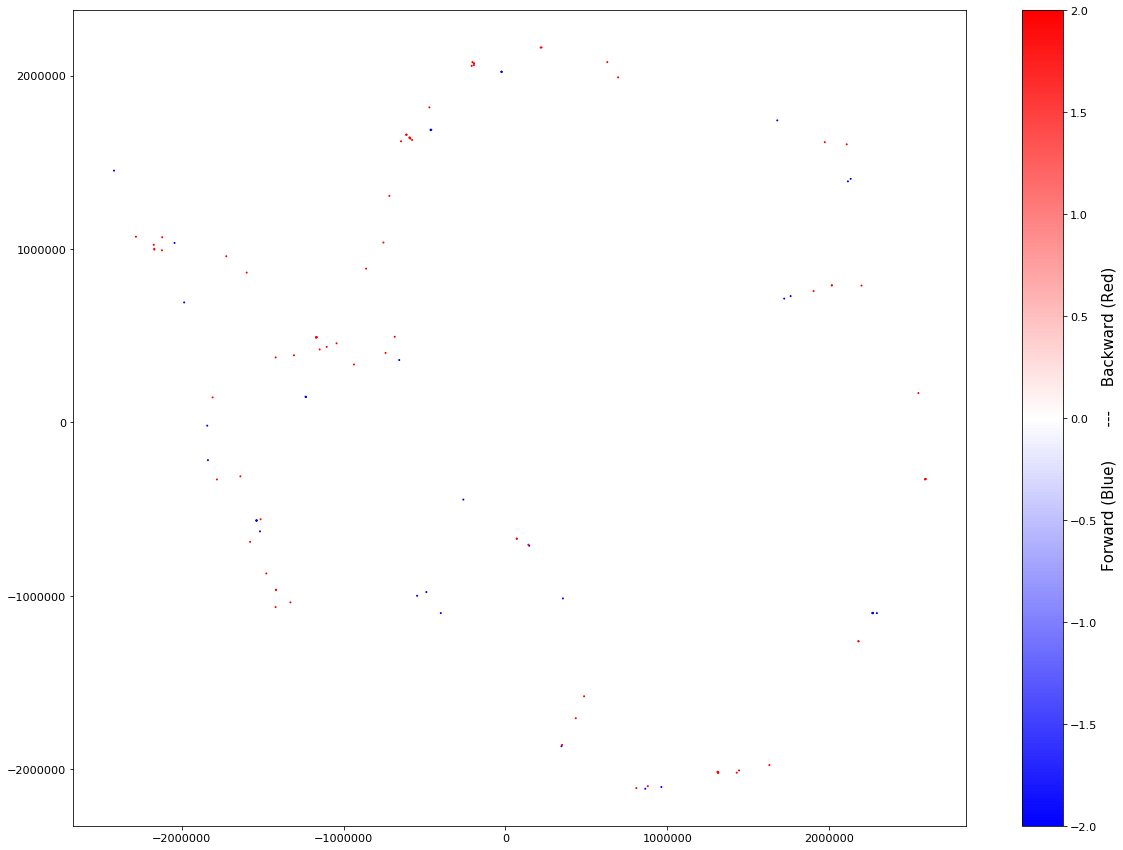

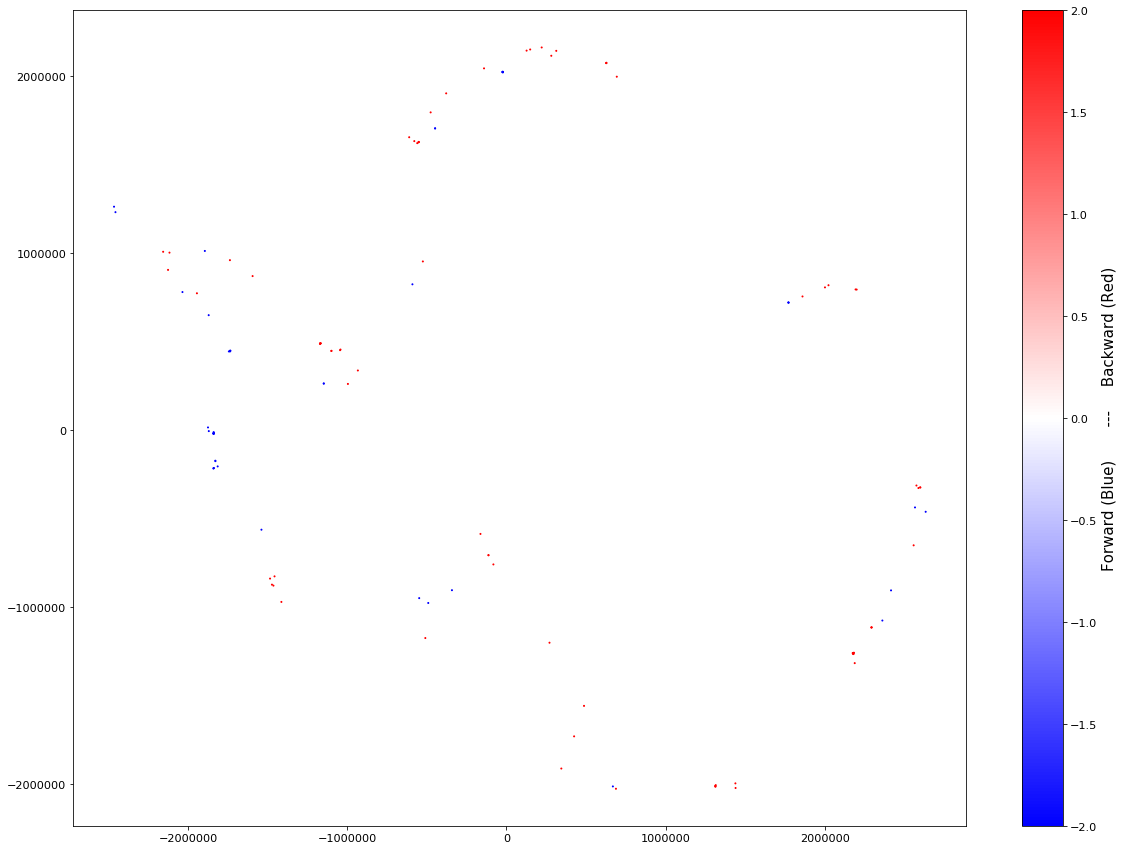

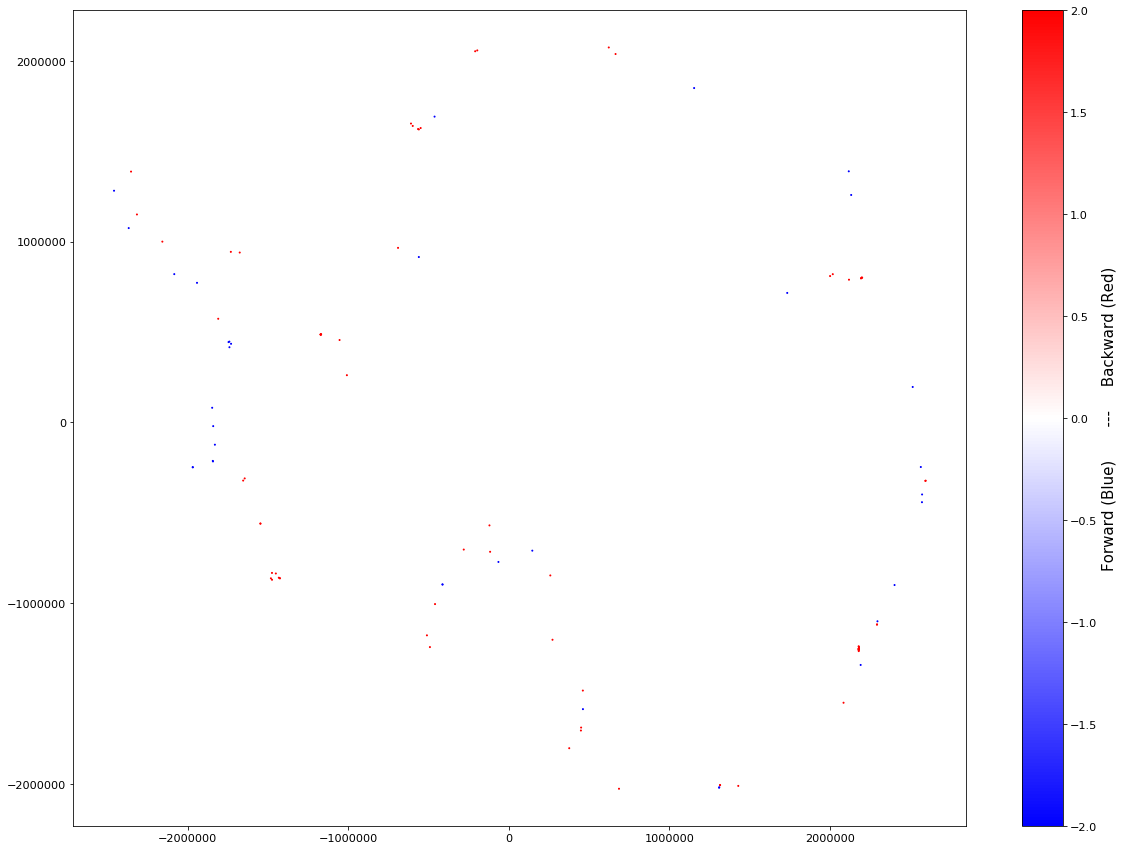

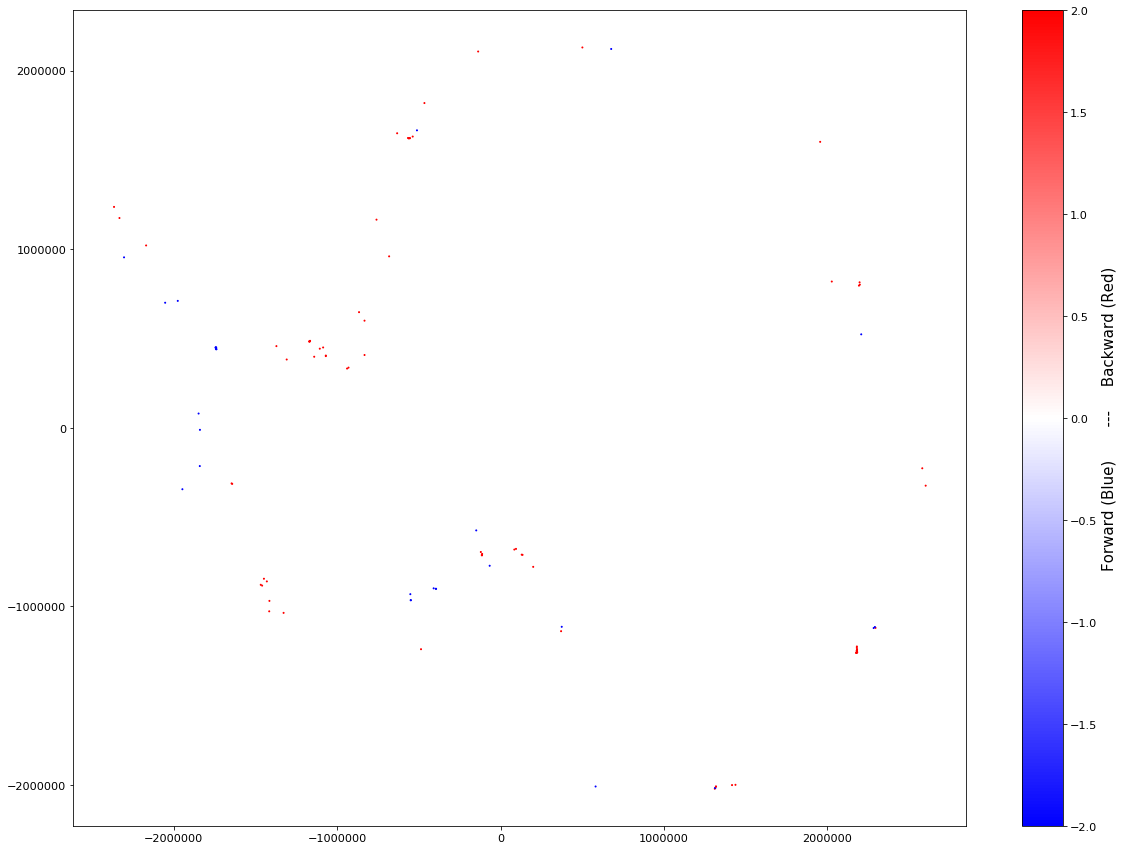

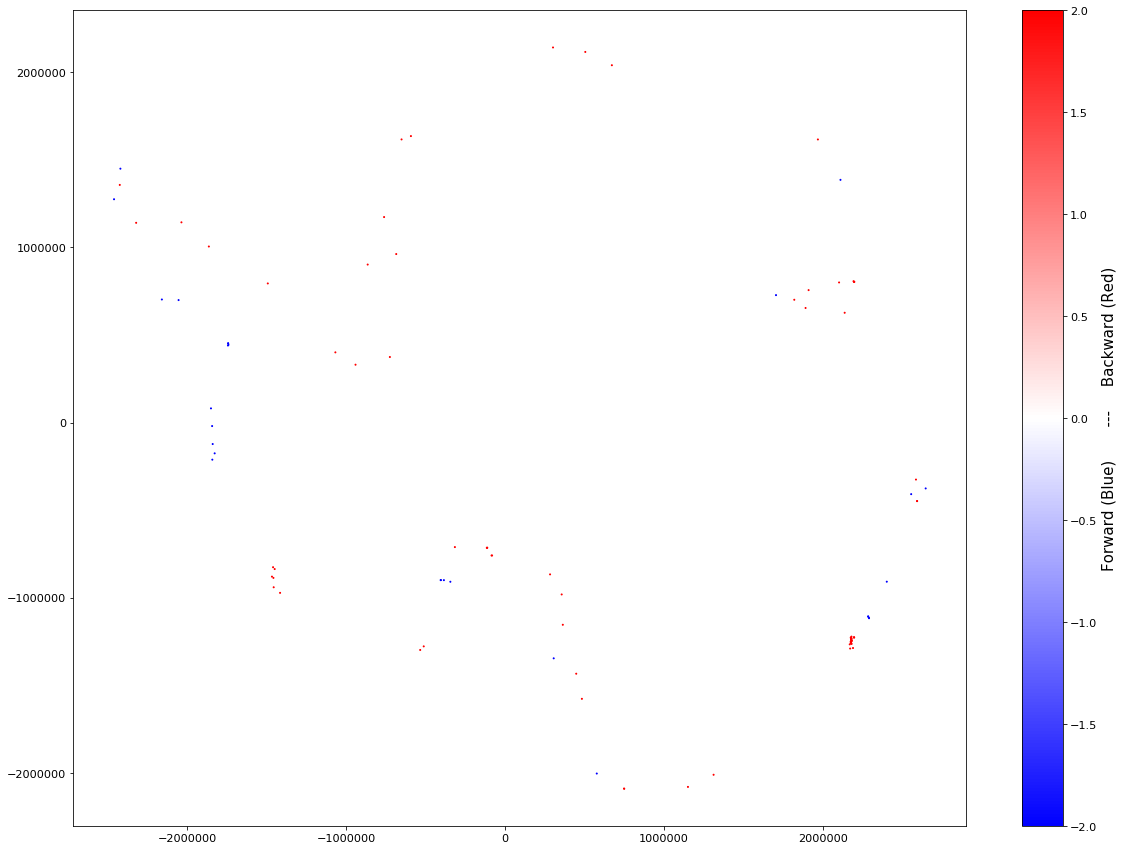

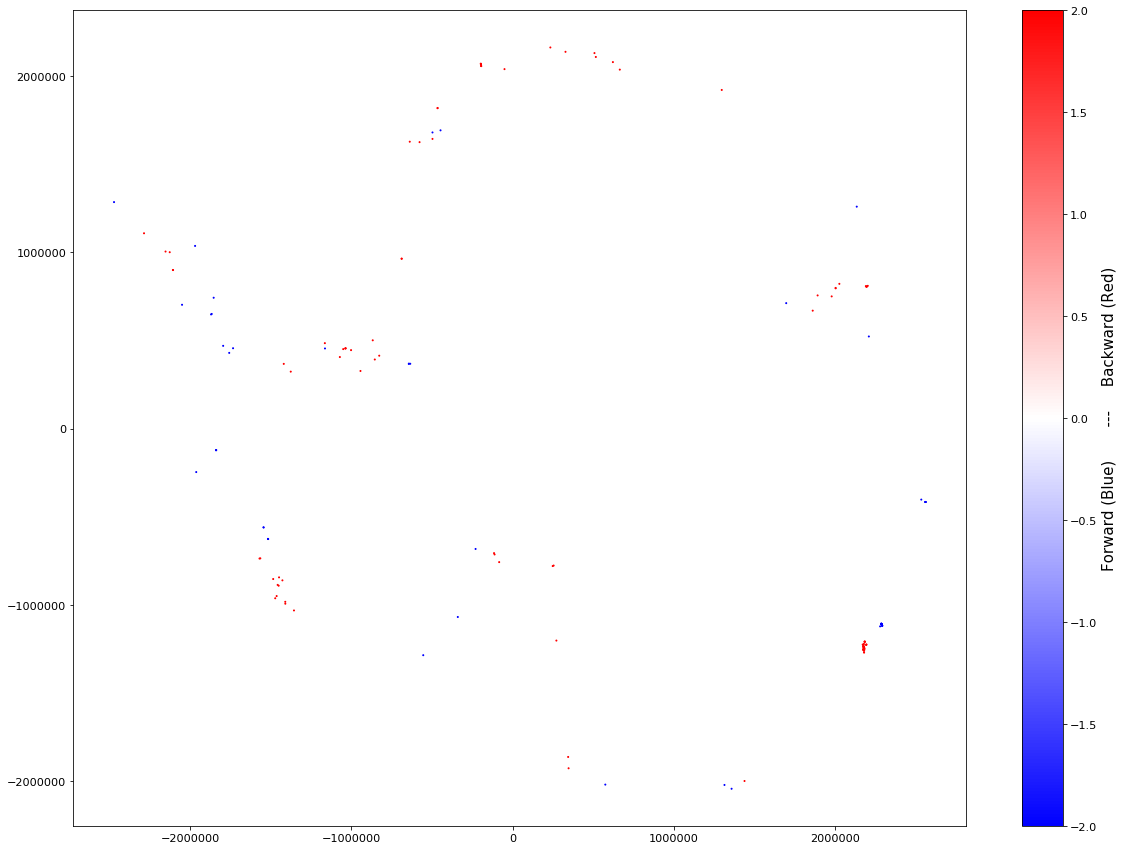

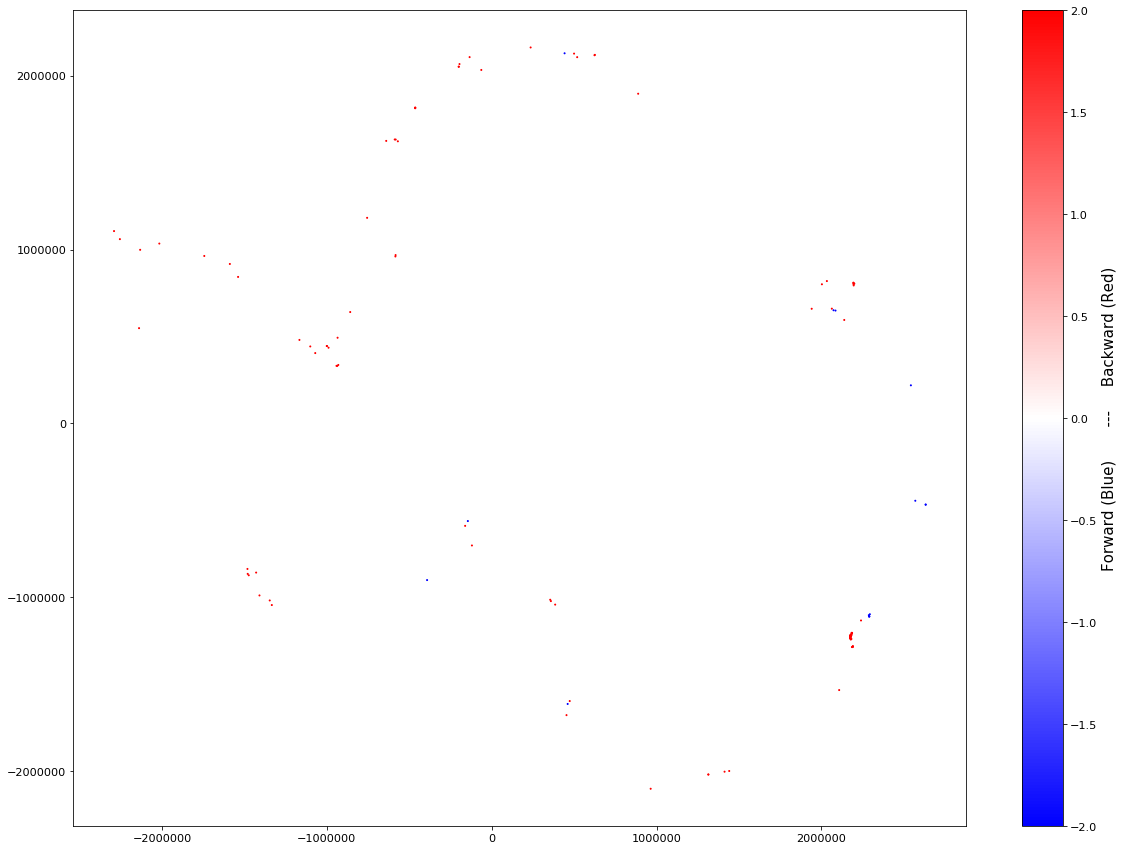

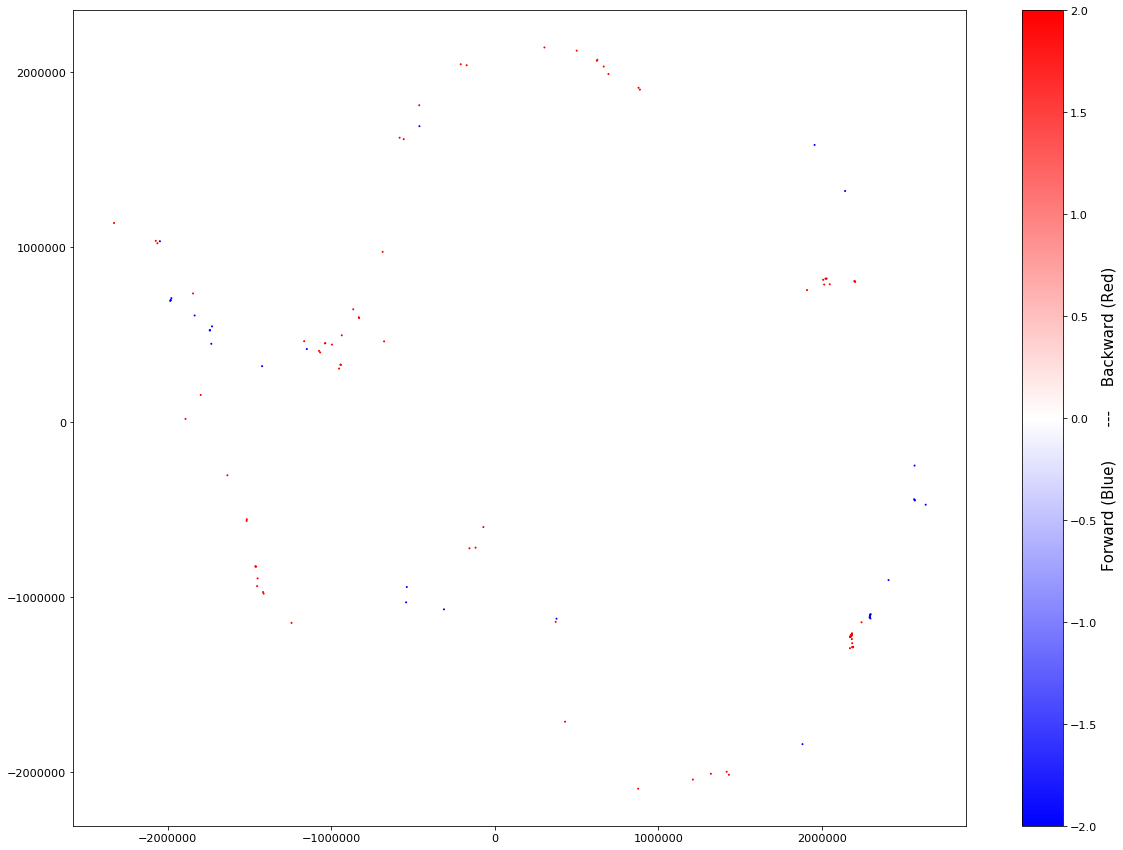

In [3]:
for i in range(0,len(blocks)-1):
    # compare velocity
    # these appear to be flow vectors of some sort.  Normalize them so we
    # can get a reasonable direction comparison
    flow_a = blocks[i].point_arrays['groundedmask'].copy()
    flow_b = blocks[i+1].point_arrays['groundedmask'].copy()
    flow_diff = flow_a-flow_b
    blocks[i].point_arrays['flow_diff']=flow_diff

    # plot normalized vectors
#     pl = pv.Plotter()
#     pl.add_mesh(blocks[i],scalars='flow_diff',clim=[-2,2],cmap='bwr')
#     pl.add_text('year '+str(i)+'- year '+str(i+1),position='upper_left', font_size=18, color=None, font=None, shadow=True, viewport=False)
# #     pl.add_arrows(blocks[1].points, flow_diff, mag=100, cmap='jet', label='flow_diff')
#     pl.show(cpos='xy')#, screenshot=figure + 'diff_ssavelocity'+str(i)+'.png')
    
    test=flow_diff
    test[test==0]=np.nan
    test[test==1]=np.nan
    test[test==-1]=np.nan
    plt.figure(figsize=[20,15])
    plt.scatter(blocks[0].points[:,0],blocks[0].points[:,1],c=test,cmap='bwr',s=1)
    cbar=plt.colorbar()
    cbar.set_label('Forward (Blue)       ---     Backward (Red)')

## ssa velocity

In [4]:
# # mesh plot
# for i in range(0,len(blocks)):
#     pl = pv.Plotter(notebook=True)
#     pl.add_mesh(blocks[i], scalars='ssavelocity', cmap='bwr',clim=[1,10000], log_scale=True)
#     pl.add_text(str(i),position='upper_left', font_size=18, color=None, font=None, shadow=True, viewport=False)
#     pl.show(cpos='xy', screenshot=figure + 'ssavelocity'+str(i)+'.png')

## GIF

In [5]:
Variable='dhdt'
gif=figure + '/dhdt_anim.gif'
import time
from IPython.display import Image

mvt=blocks[0]
plotter = pv.Plotter()

plotter.open_gif(gif)

for i in range(0,len(blocks)):
    plotter.add_mesh(blocks[i], scalars=Variable, clim=[-10,10], cmap='bwr')
    plotter.add_text(str(i),position='upper_left', font_size=18, color=None, font=None, shadow=True, viewport=False)
#     plotter.write_frame()
    for n in range(5):
        plotter.write_frame()
    plotter.clear()


plotter.close()


# Image(filename=gif)

## difference ssa velocity

In [6]:
# for i in range(0,len(blocks)-1):
#     # compare velocity
#     # these appear to be flow vectors of some sort.  Normalize them so we
#     # can get a reasonable direction comparison
#     flow_a = blocks[i].point_arrays['ssavelocity'].copy()
#     flow_b = blocks[i+1].point_arrays['ssavelocity'].copy()
#     flow_diff = np.abs(flow_a-flow_b)
#     blocks[i].point_arrays['flow_diff']=flow_diff

#     # plot normalized vectors
#     pl = pv.Plotter()
#     pl.add_mesh(blocks[i],scalars='flow_diff',clim=[1,1E3],cmap='Blues', log_scale=True)
#     pl.add_text('year '+str(i)+'- year '+str(i+1),position='upper_left', font_size=18, color=None, font=None, shadow=True, viewport=False)
# #     pl.add_arrows(blocks[1].points, flow_diff, mag=100, cmap='jet', label='flow_diff')
#     pl.show(cpos='xy', screenshot=figure + 'diff_ssavelocity'+str(i)+'.png')

In [7]:
# # contour
# i = 0
# contours = blocks[i].contour(isosurfaces=1000, scalars='ssavelocity', compute_normals=False,
#                              compute_gradients=False, compute_scalars=True, rng=None, preference='cell', method='contour')
# pl = pv.Plotter()
# pl.add_mesh(blocks[i], scalars='ssavelocity', cmap='jet', log_scale=True)
# pl.add_mesh(
#     contours,
#     scalars='ssavelocity',
#     cmap='seismic',
#     log_scale=True)
# pl.show(cpos='xy')

## Thickness
### Free ice area
The area of free ice is define by the difference between the "lower than 1" at time i and at time i+1. The 'lower than 1" area is where the ice is thinner or equal to 1m thickness. I am creating a mask where all the area take the values -1 expect the "lower than 1" area which take the value 0. So I have 1 or -1, there is a variation of the ice cover.

Here, we observe the variation of the ice cover between two years of simulation.
In red, we have the cells which are newly covered by ice and in blue the cells which are newly uncovered by ice.

We observed that there is an opposition between ice gain and ice loss. The number of points which is loosing and winning is pretty constant around 600 but the area of free ice is slightly growing

/home/urrutyb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in greater
/home/urrutyb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in less


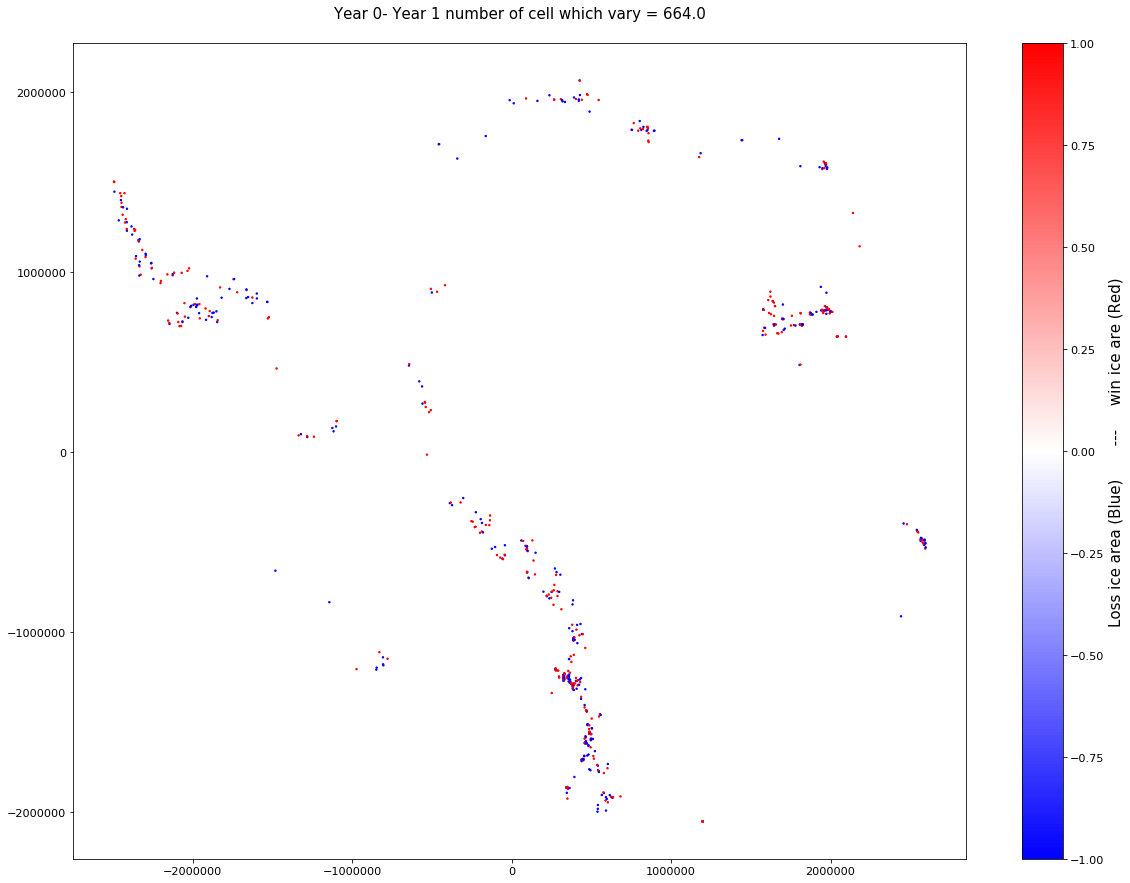

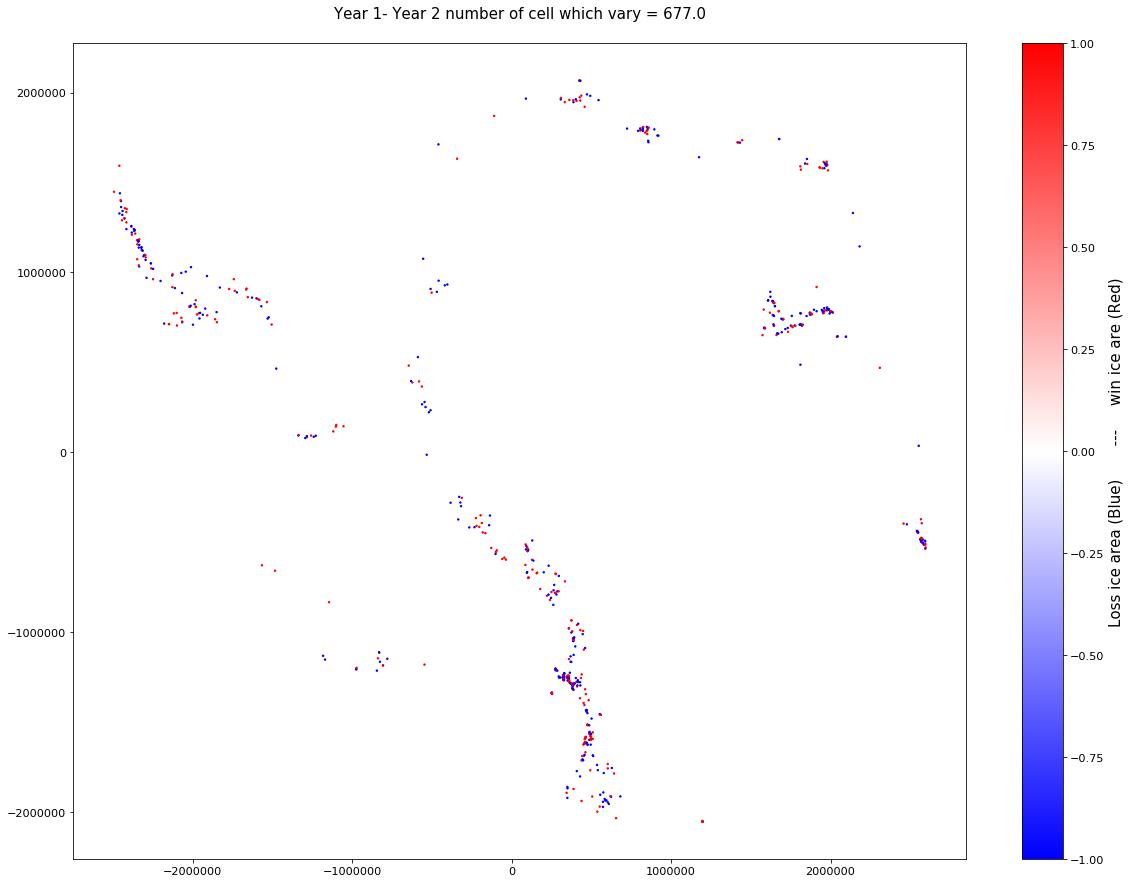

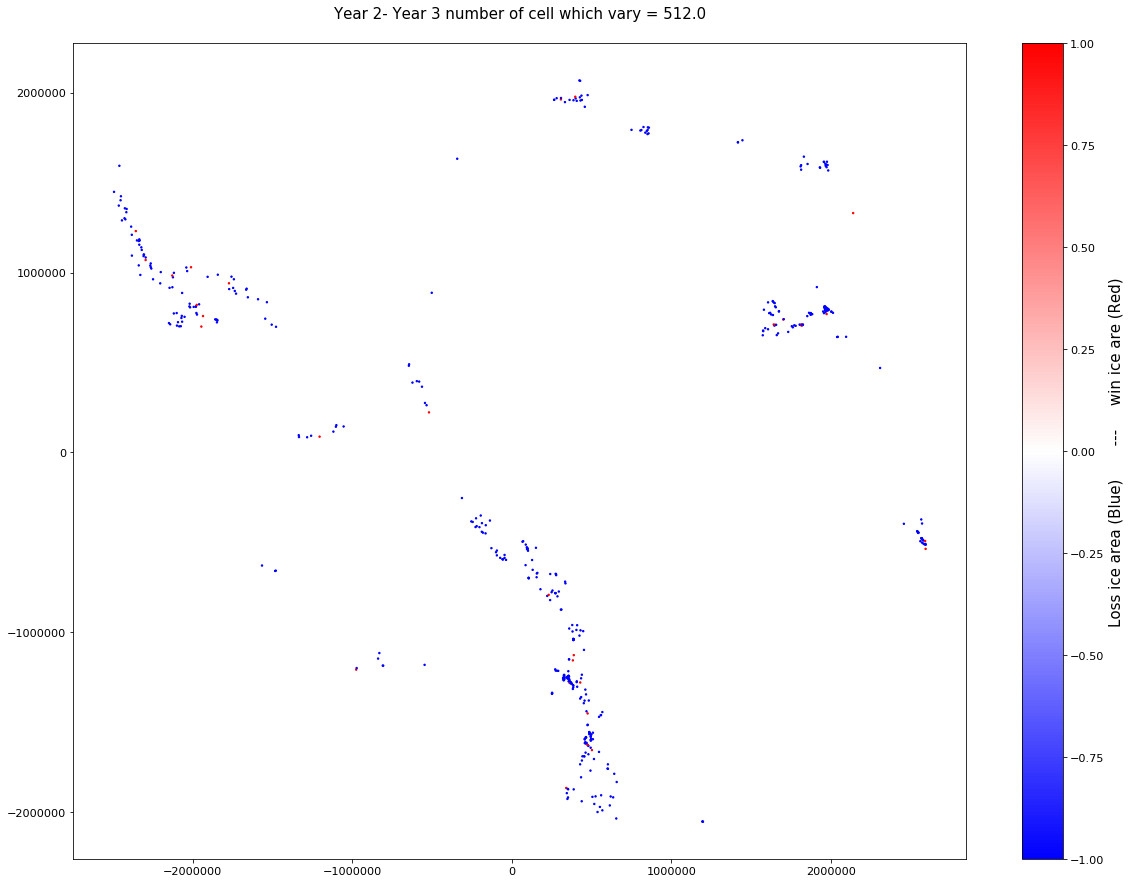

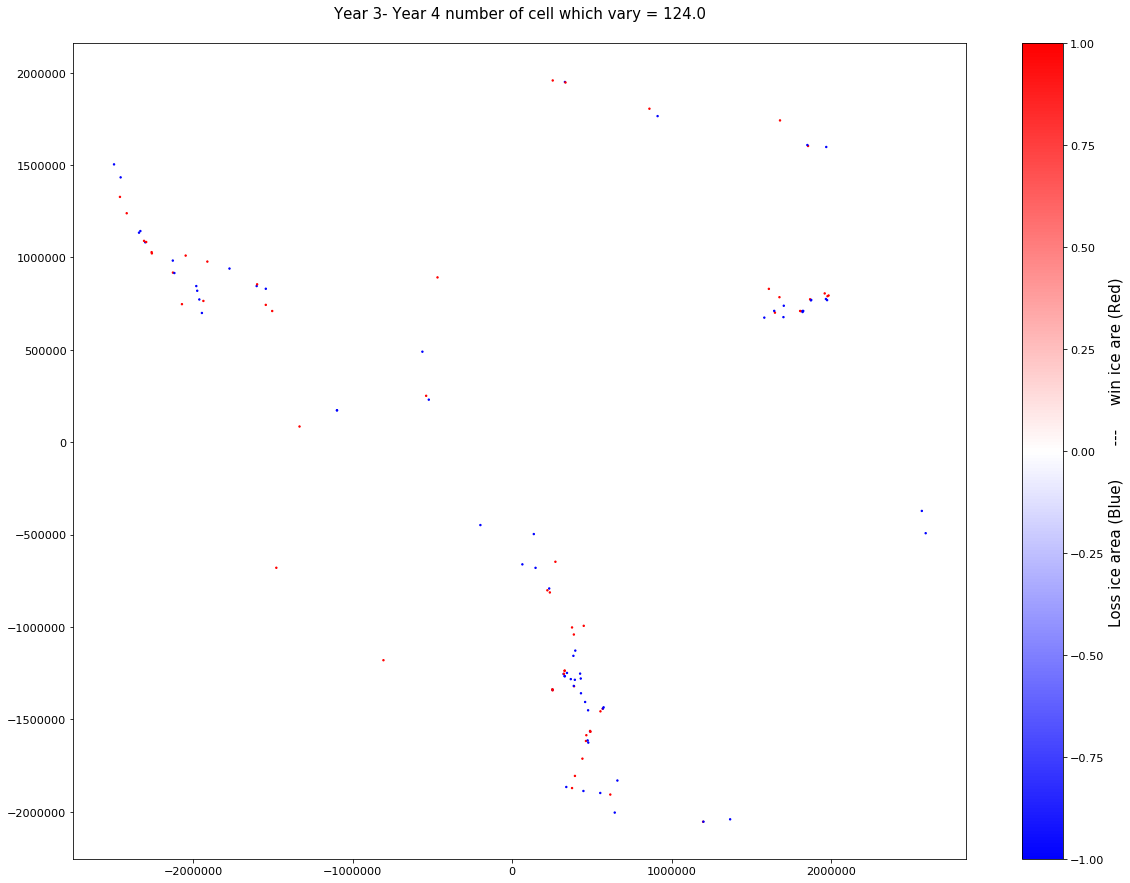

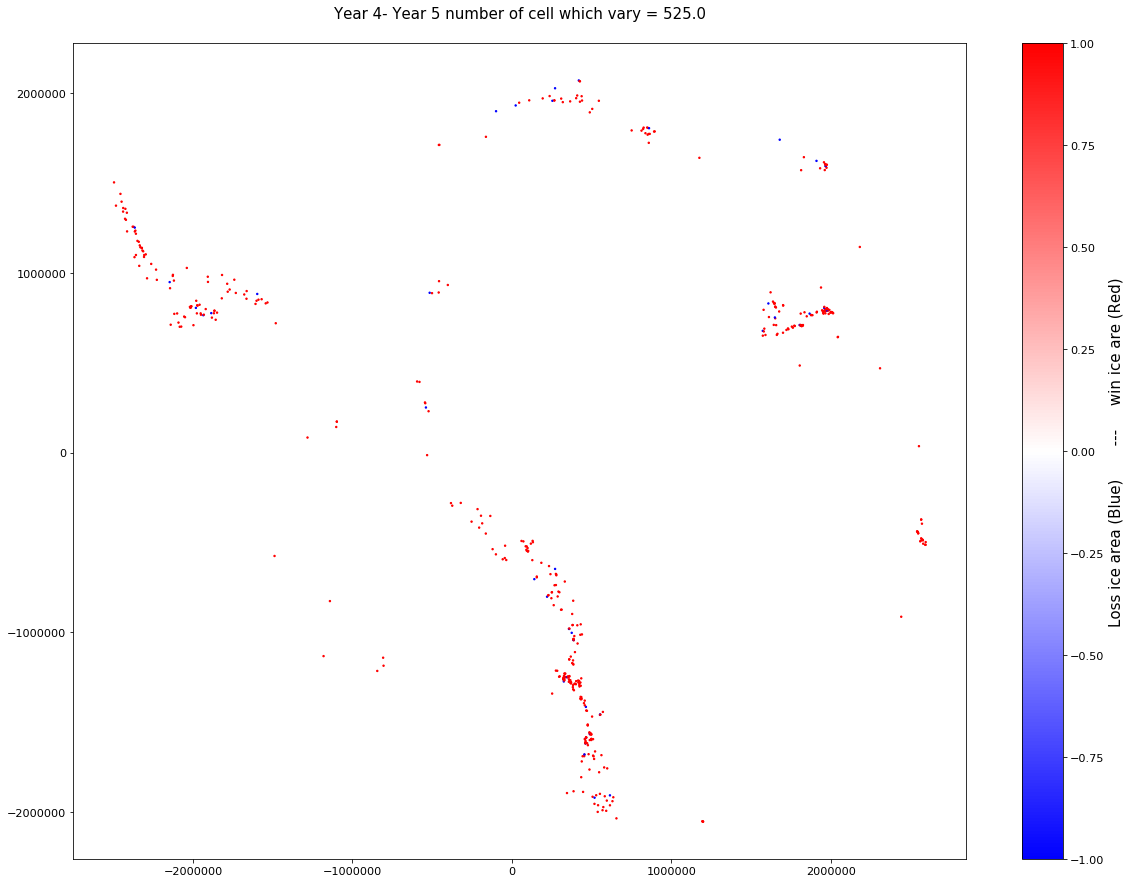

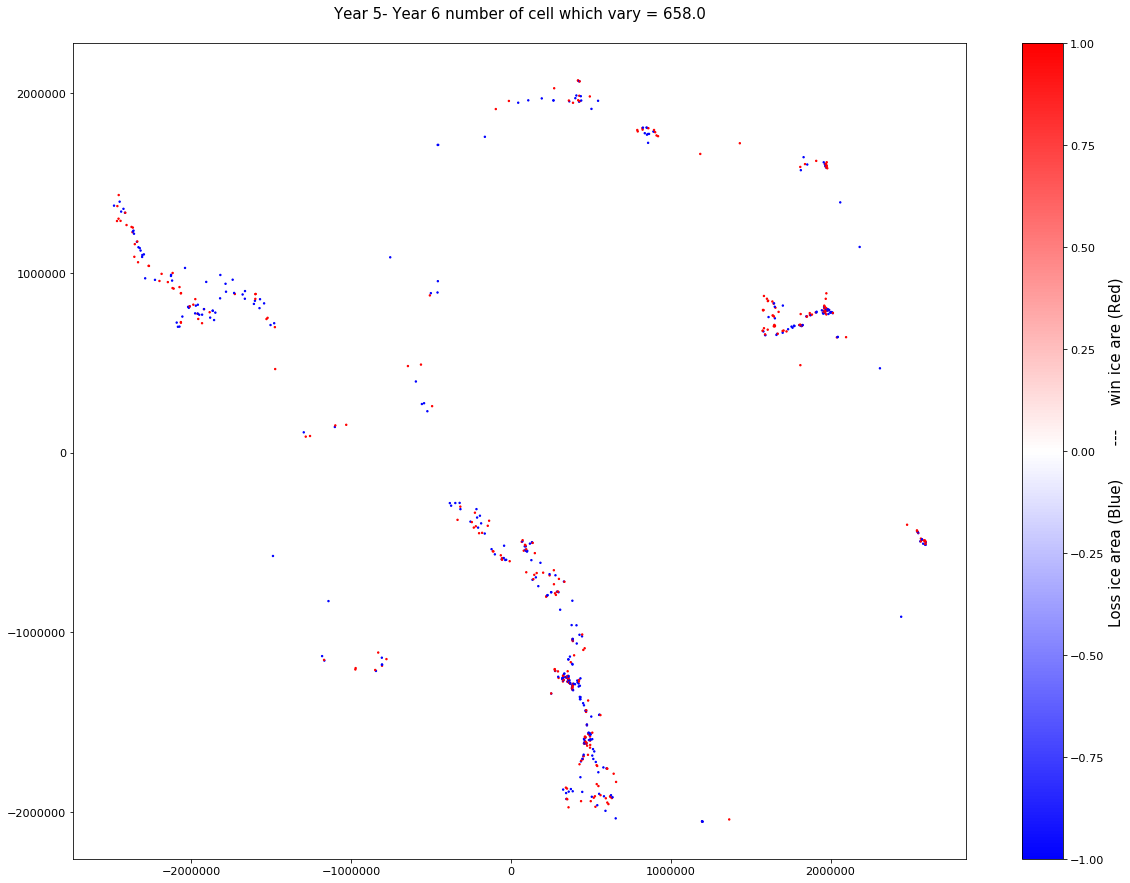

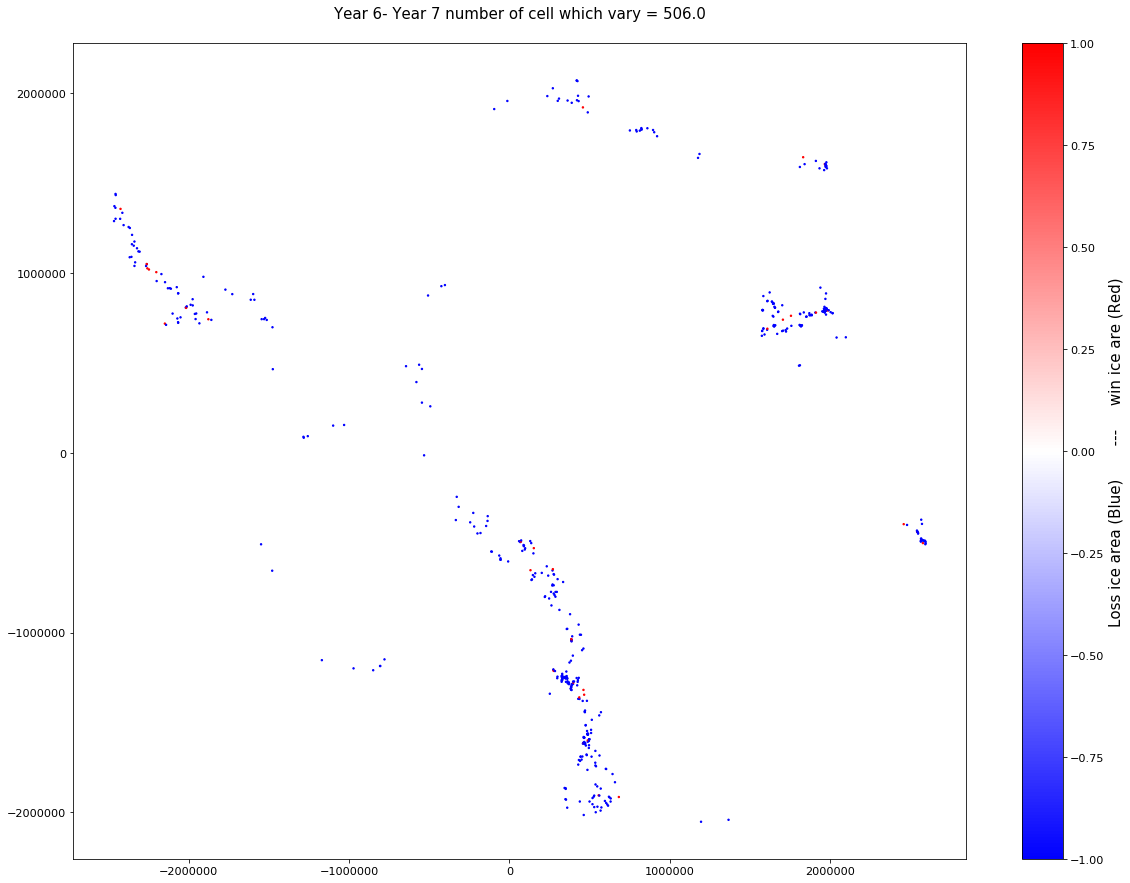

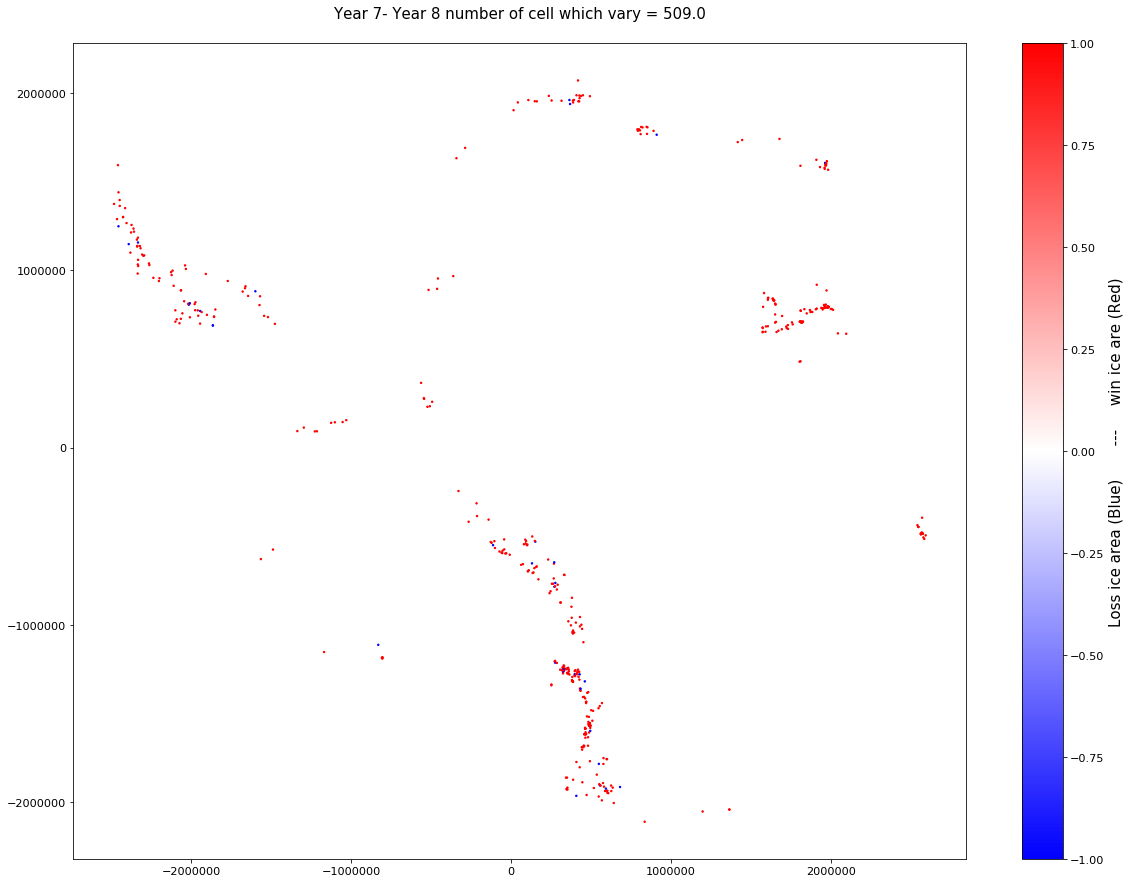

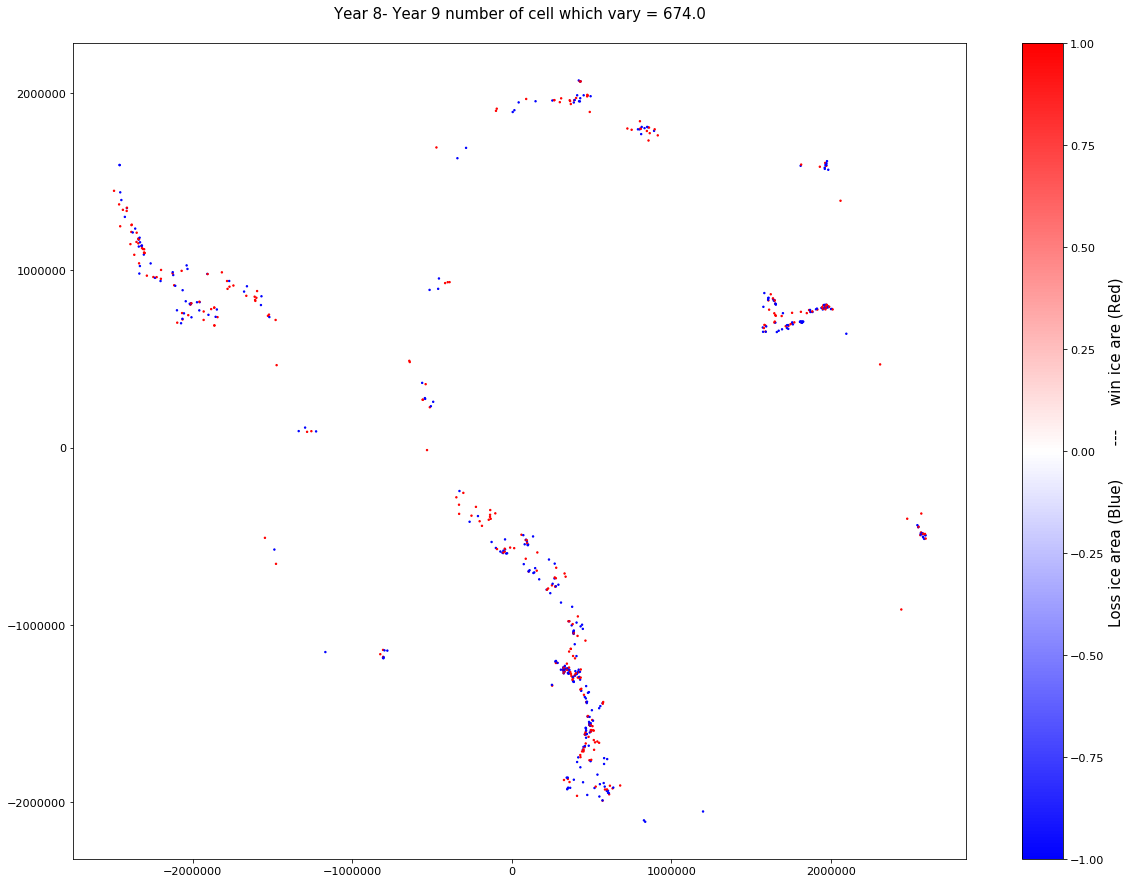

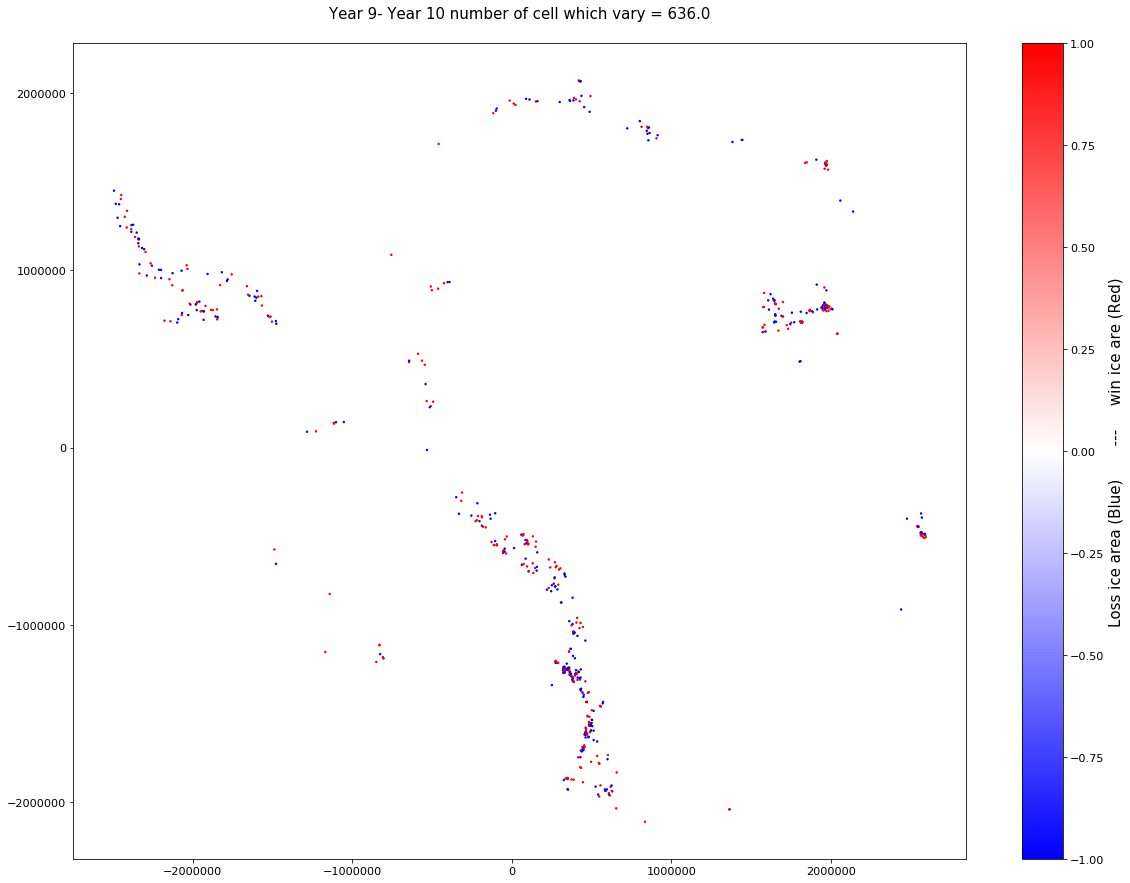

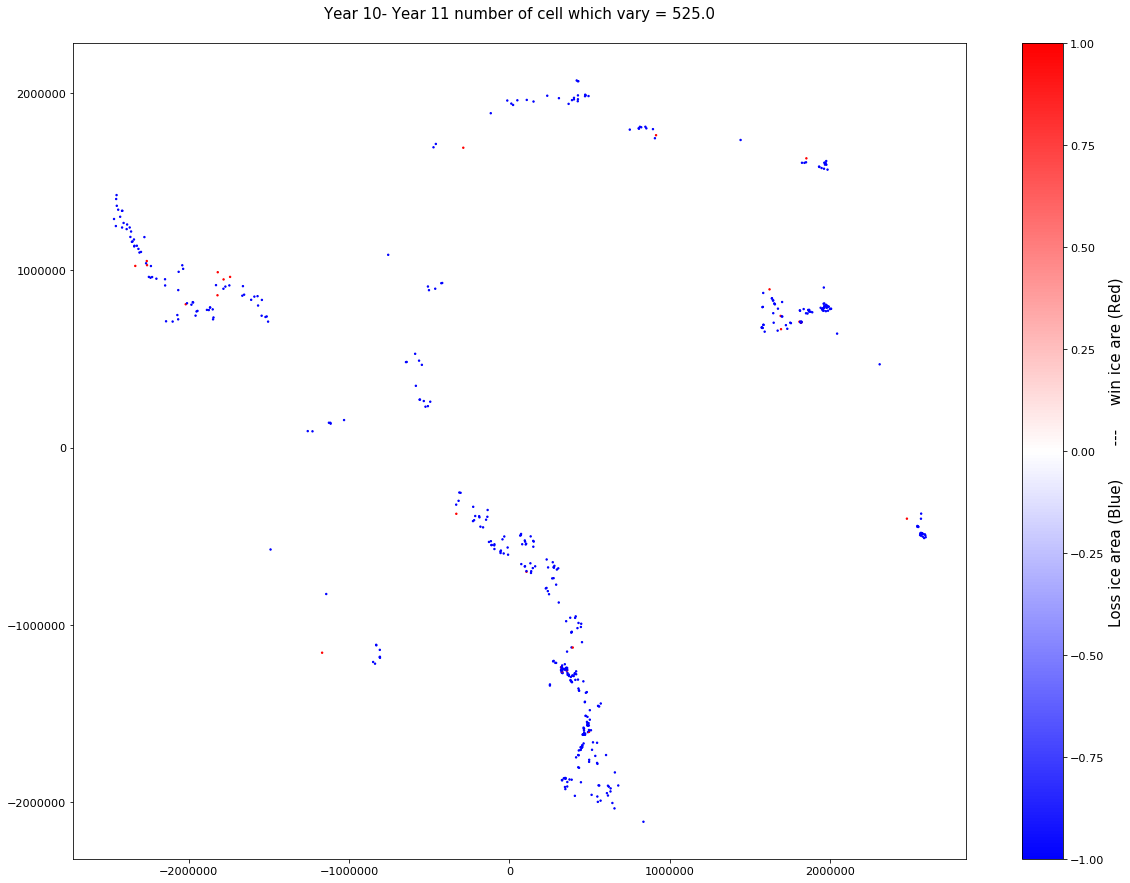

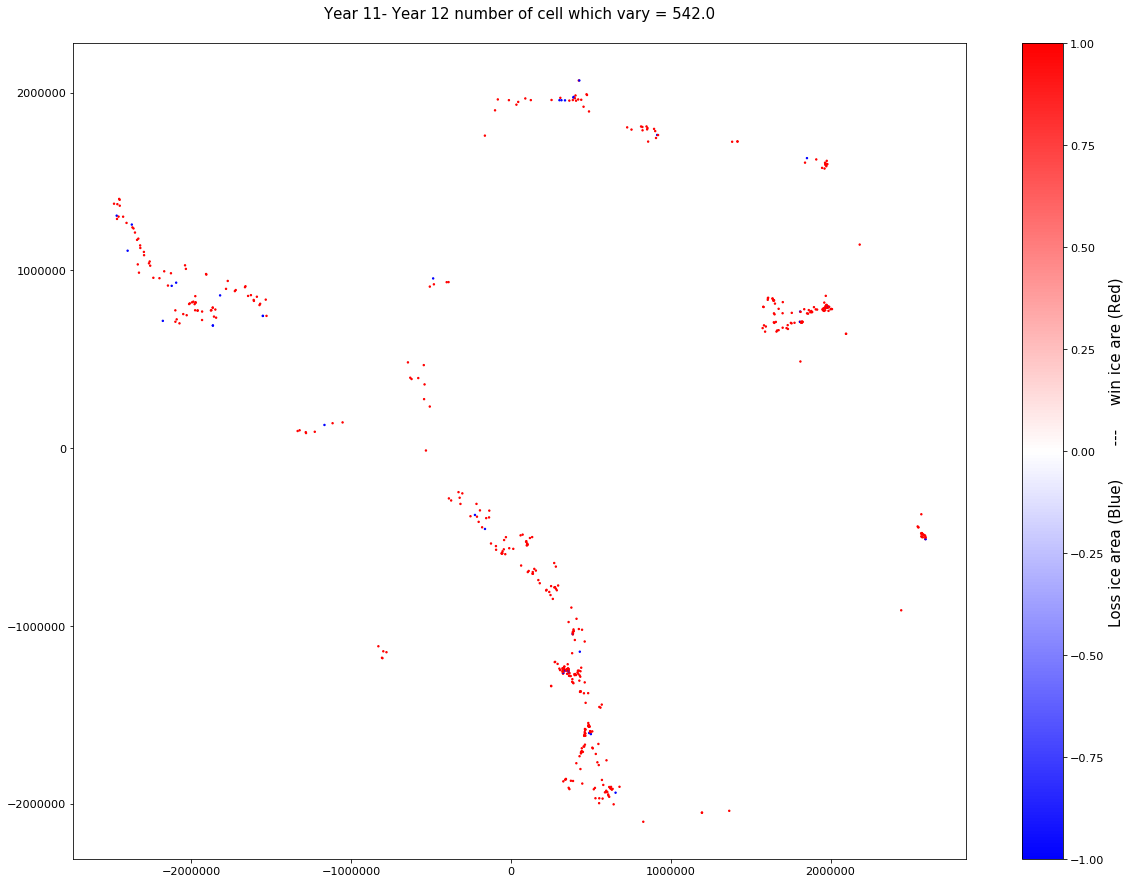

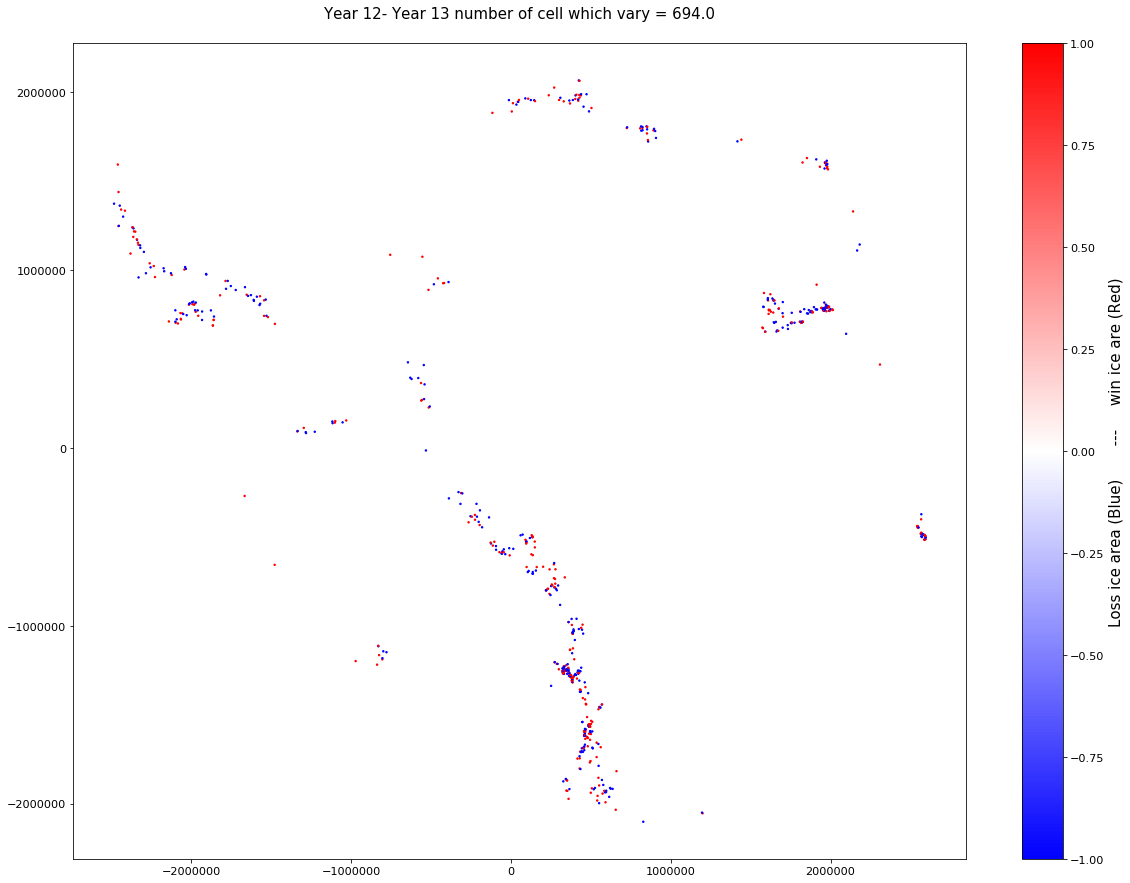

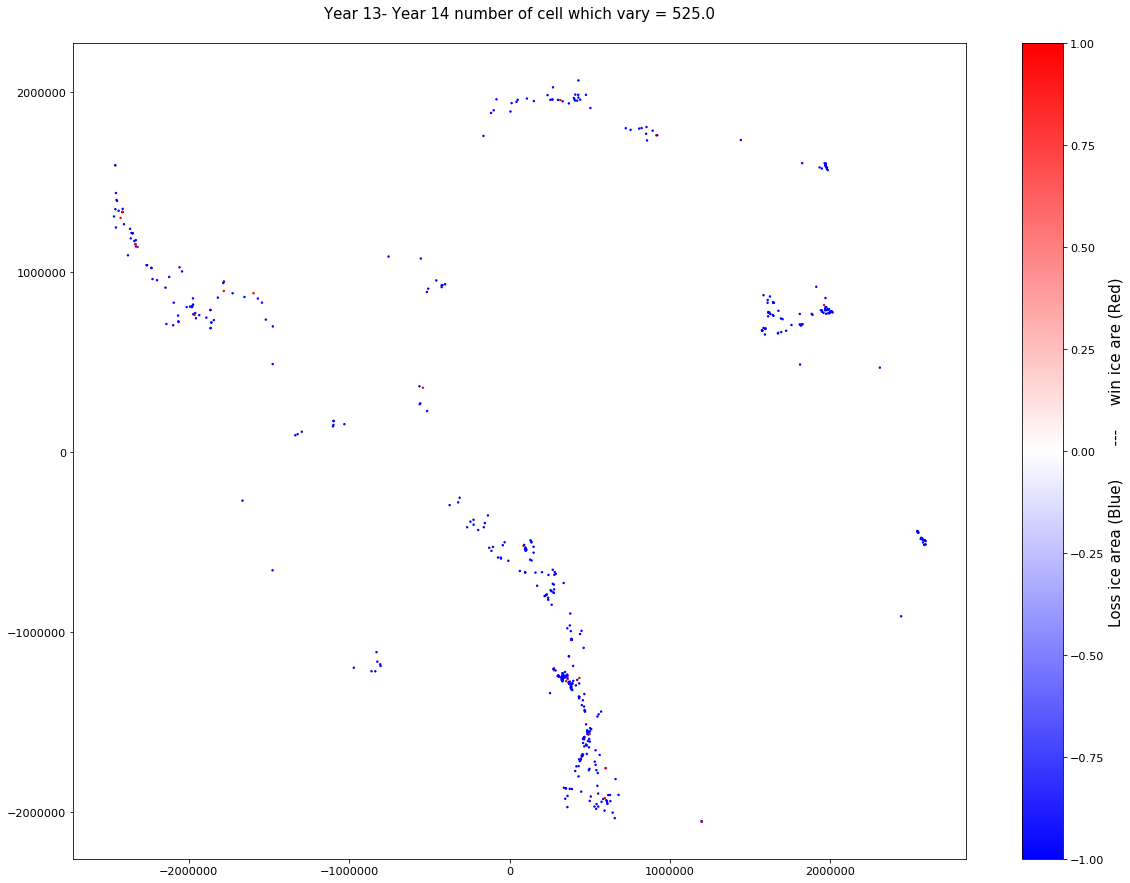

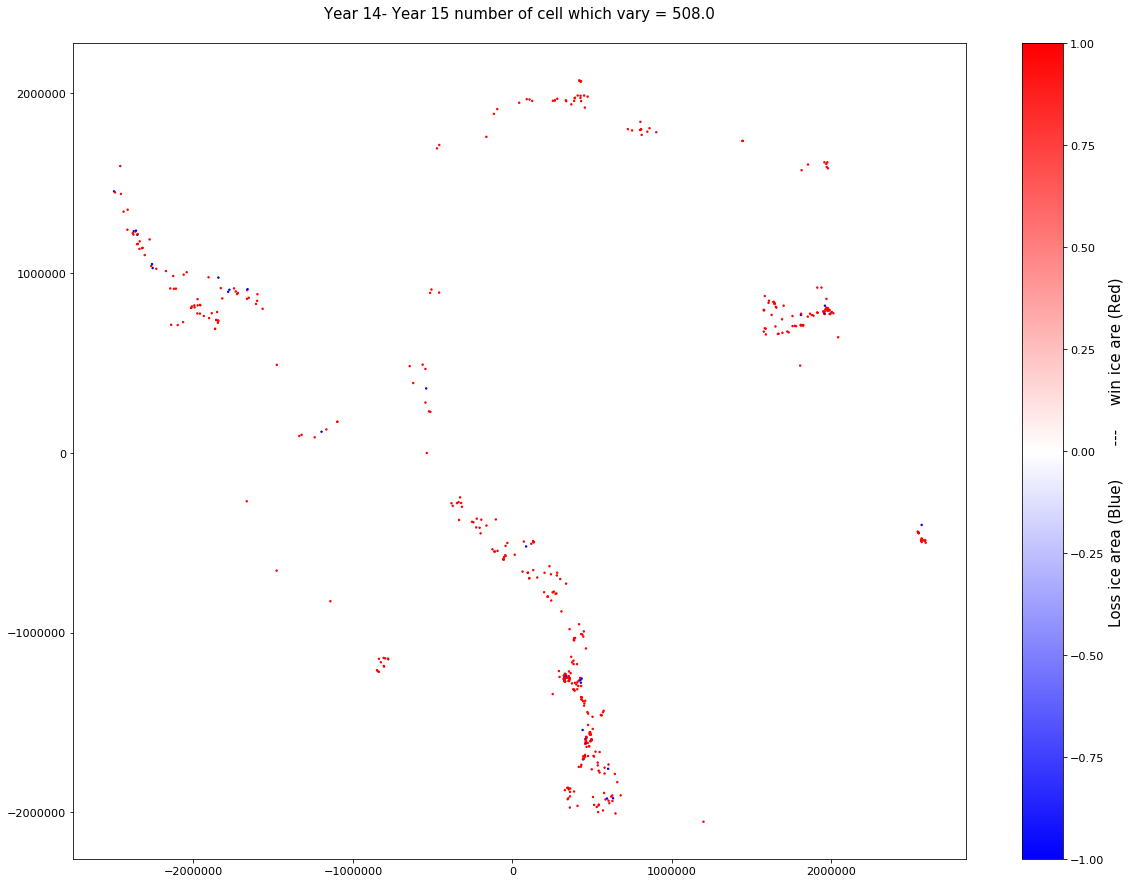

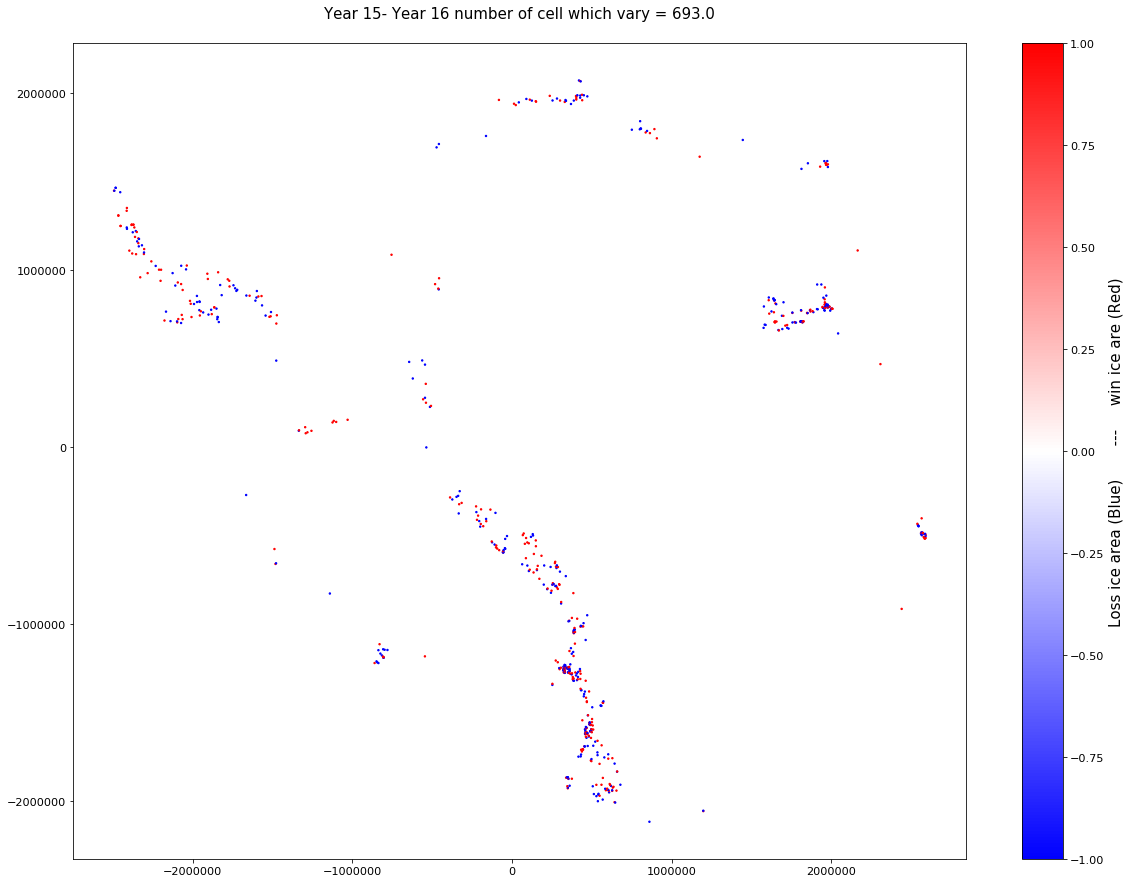

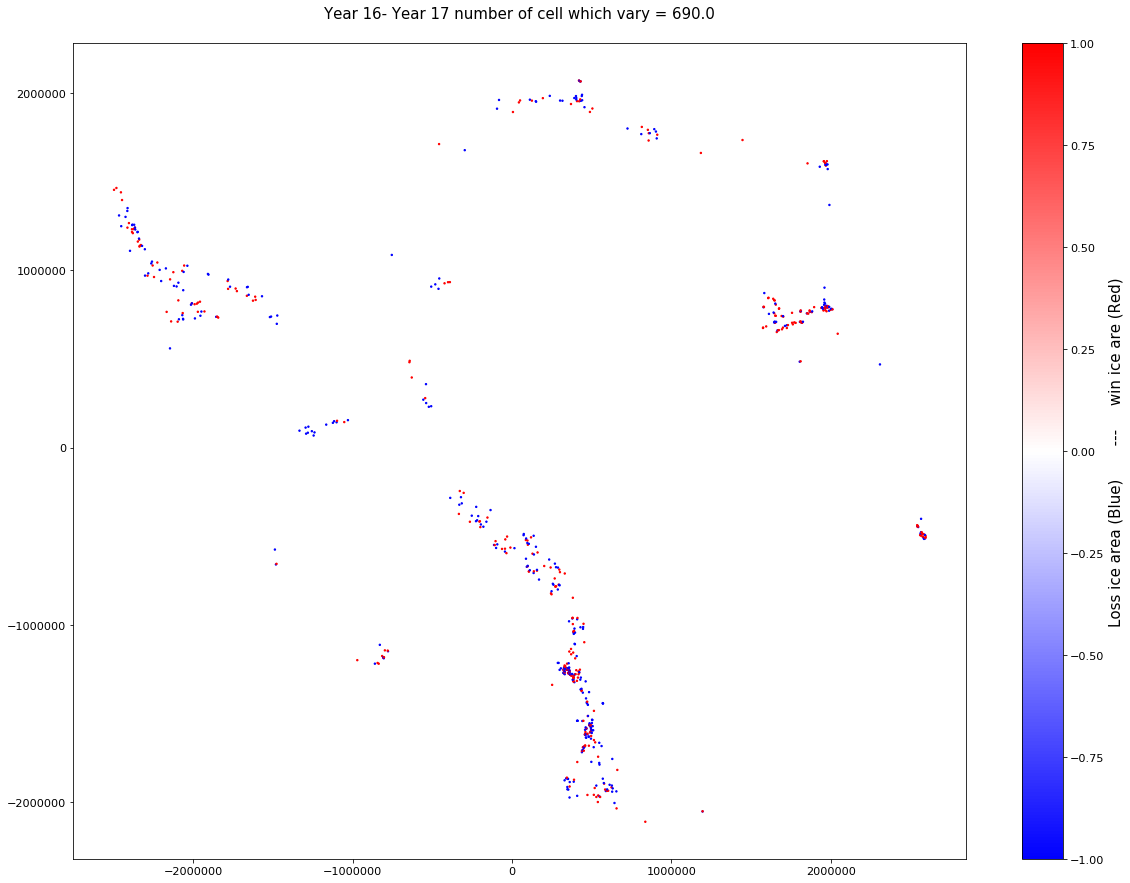

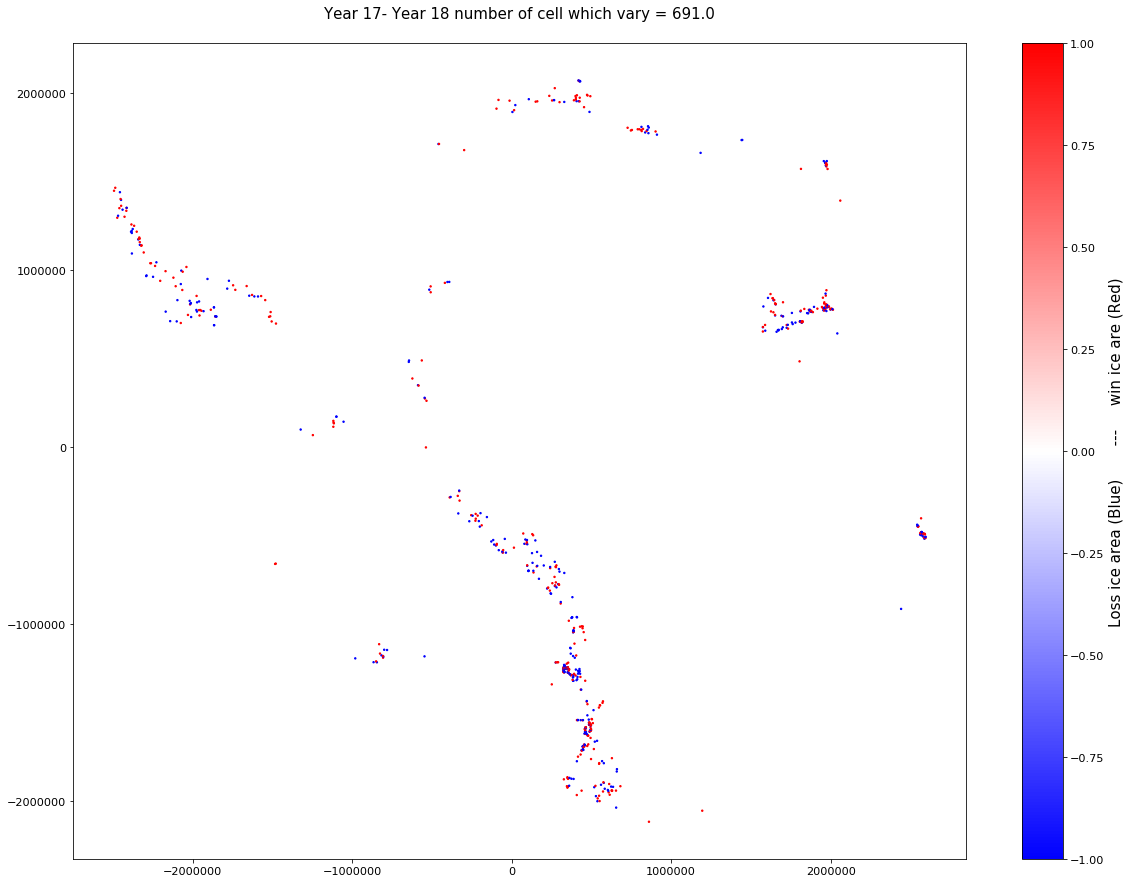

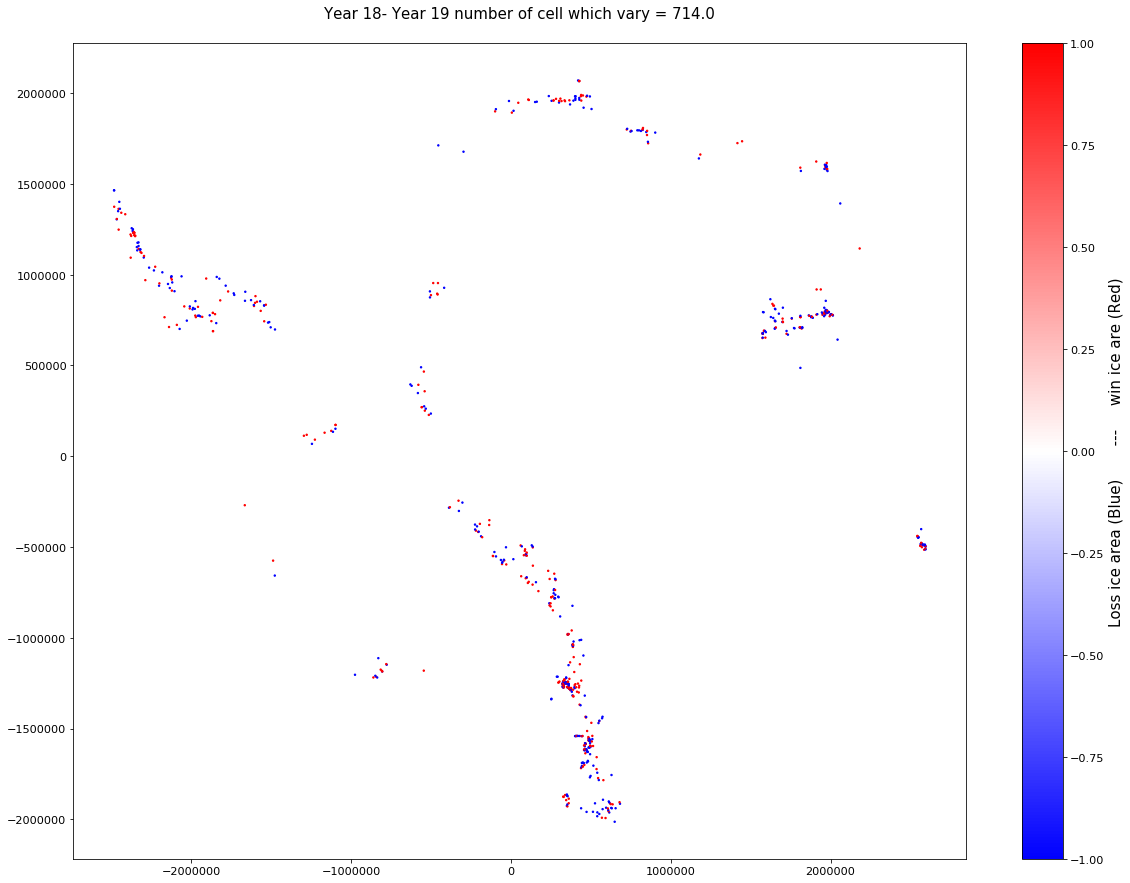

In [8]:
nb=np.zeros(len(blocks)-1)
nbpos=np.zeros(len(blocks)-1)
nbneg=np.zeros(len(blocks)-1)

for i in range(0,len(blocks)-1):

    
    flow_a = blocks[i].point_arrays['h'].copy()
    flow_a[flow_a<=1]=0
    flow_a[flow_a>1]=-1
    flow_b = blocks[i+1].point_arrays['h'].copy()
    flow_b[flow_b<=1]=0
    flow_b[flow_b>1]=-1
    flow_diff = flow_a-flow_b
    blocks[i].point_arrays['flow_diff']=flow_diff

    test=flow_diff
    test[test==0]=np.nan
#     test[test==-1]=np.nan
    plt.figure(figsize=[20,15])
    plt.scatter(blocks[0].points[:,0],blocks[0].points[:,1],c=test,cmap='bwr',s=2)
    cbar=plt.colorbar()
    nb[i]=np.nansum(abs(test))
    nbpos[i]=np.nansum(test>0)
    nbneg[i]=np.nansum(test<0)
    plt.title('Year '+str(i)+'- Year '+str(i+1) + ' number of cell which vary = ' + str(nb[i]))
    cbar.set_label('Loss ice area (Blue)       ---     win ice are (Red)')
    

Text(0, 0.5, 'Surface Free of Ice ($m^2$)')

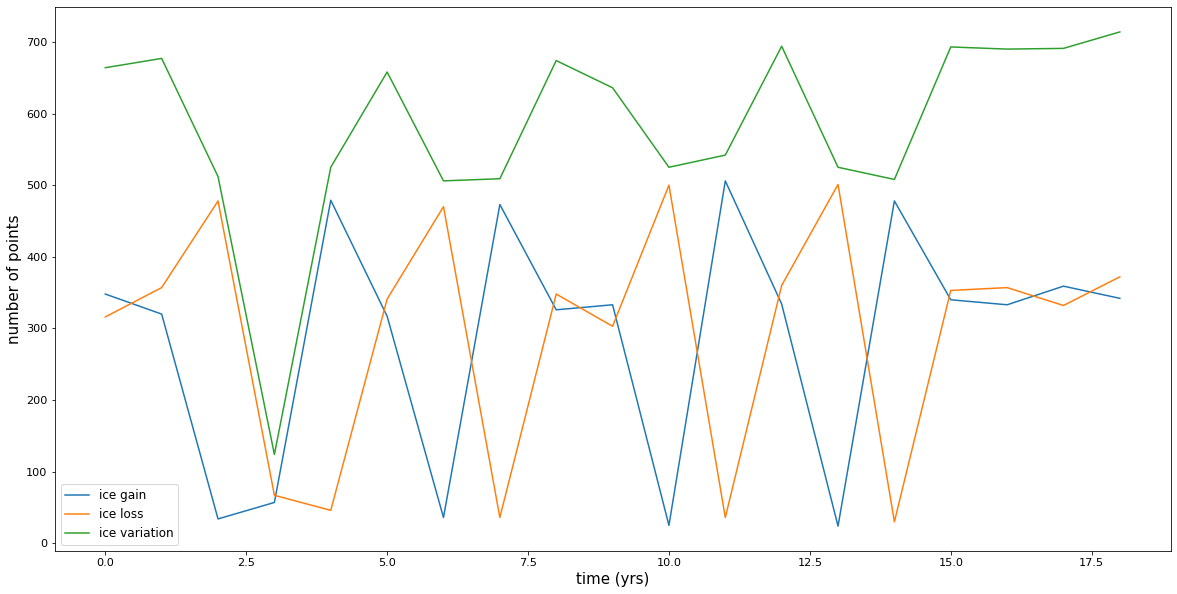

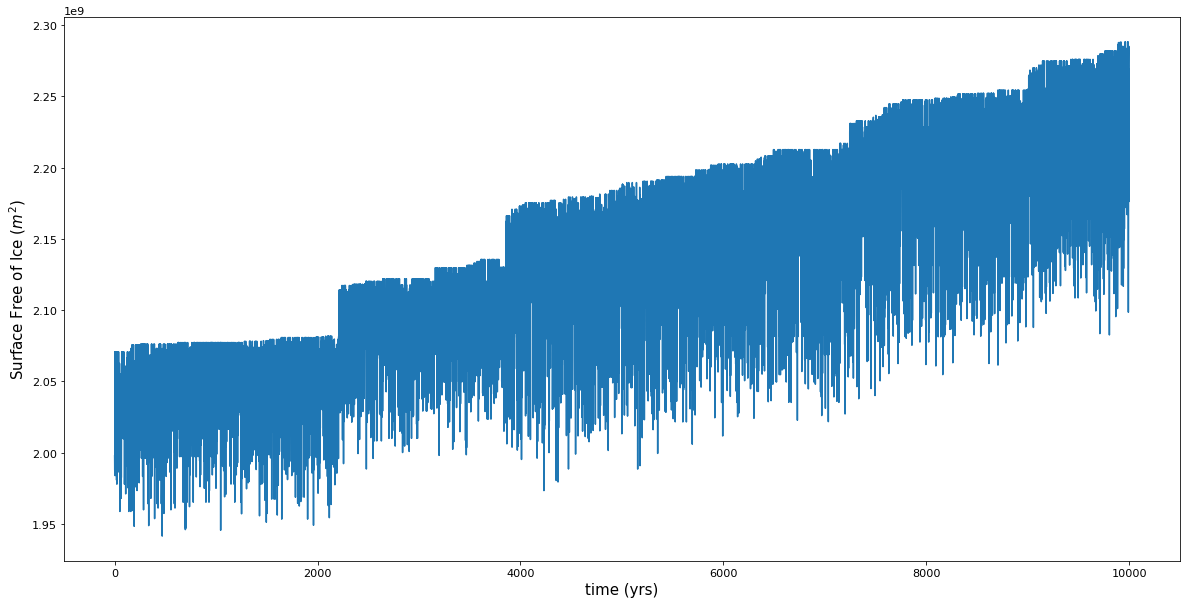

In [9]:
plt.figure(figsize=[20,10])
plt.plot(nbpos,label='ice gain')
plt.plot(nbneg,label='ice loss')
plt.plot(nb, label='ice variation')
plt.xlabel('time (yrs)')
plt.ylabel('number of points')
plt.legend()


plt.figure(figsize=[20,10])
plt.plot(Free)
plt.xlabel('time (yrs)')
plt.ylabel(r'Surface Free of Ice ($m^2$)')